In [715]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow.keras import backend

%matplotlib inline

In [372]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True

In [373]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [374]:
len(df.columns)

23

In [375]:
df.values.shape

(145460, 23)

In [376]:
categorical = []
numerical = []

for feature in df.columns:
    if df[feature].dtype == 'object':
        categorical.append(feature)
    else:
        numerical.append(feature)

In [377]:
# numericki atributi

print(numerical)
print('Ukupan broj numerickih atributa:', len(numerical))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Ukupan broj numerickih atributa: 16


In [378]:
# kategoricki atributi

print(categorical)
print('Ukupan broj kategorickih atributa:', len(categorical))

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Ukupan broj kategorickih atributa: 7


<AxesSubplot:>

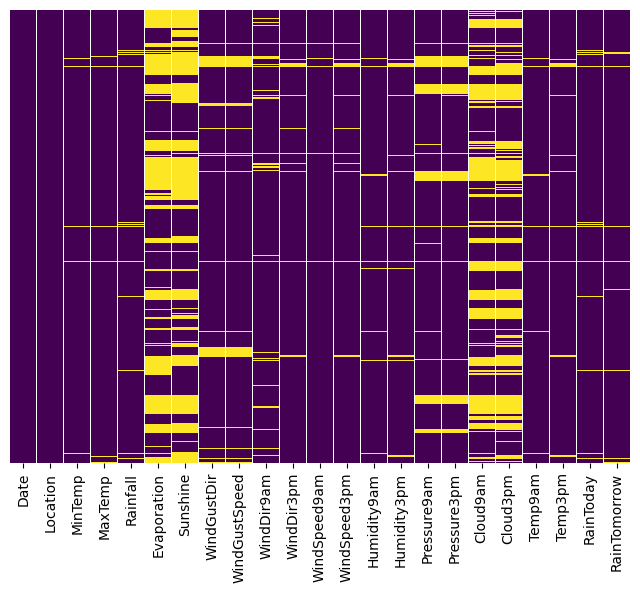

In [379]:
plt.figure(num=None, figsize=(8, 6), dpi=100)
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [380]:
df.isna().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [381]:
date = df['Date'].value_counts().sort_values(ascending=False)
len(date)

3436

In [382]:
#sns.countplot(x='Date', data=df)

In [383]:
location = df['Location'].value_counts()
location

Canberra            3436
Sydney              3344
Perth               3193
Melbourne           3193
Darwin              3193
Adelaide            3193
Brisbane            3193
Hobart              3193
Bendigo             3040
Albury              3040
MountGambier        3040
Albany              3040
Ballarat            3040
Wollongong          3040
Launceston          3040
AliceSprings        3040
Cairns              3040
Townsville          3040
MountGinini         3040
GoldCoast           3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
MelbourneAirport    3009
CoffsHarbour        3009
WaggaWagga          3009
Cobar               3009
NorfolkIsland       3009
Witchcliffe         3009
SydneyAirport       3009
PerthAirport        3009
Sale                3009
Mildura             3009
Moree               3009
Williamtown         3009
PearceRAAF          3009
Dartmoor            3009
Nuriootpa           3009
Portland            3009
Richmond            3009


<AxesSubplot:xlabel='Location', ylabel='count'>

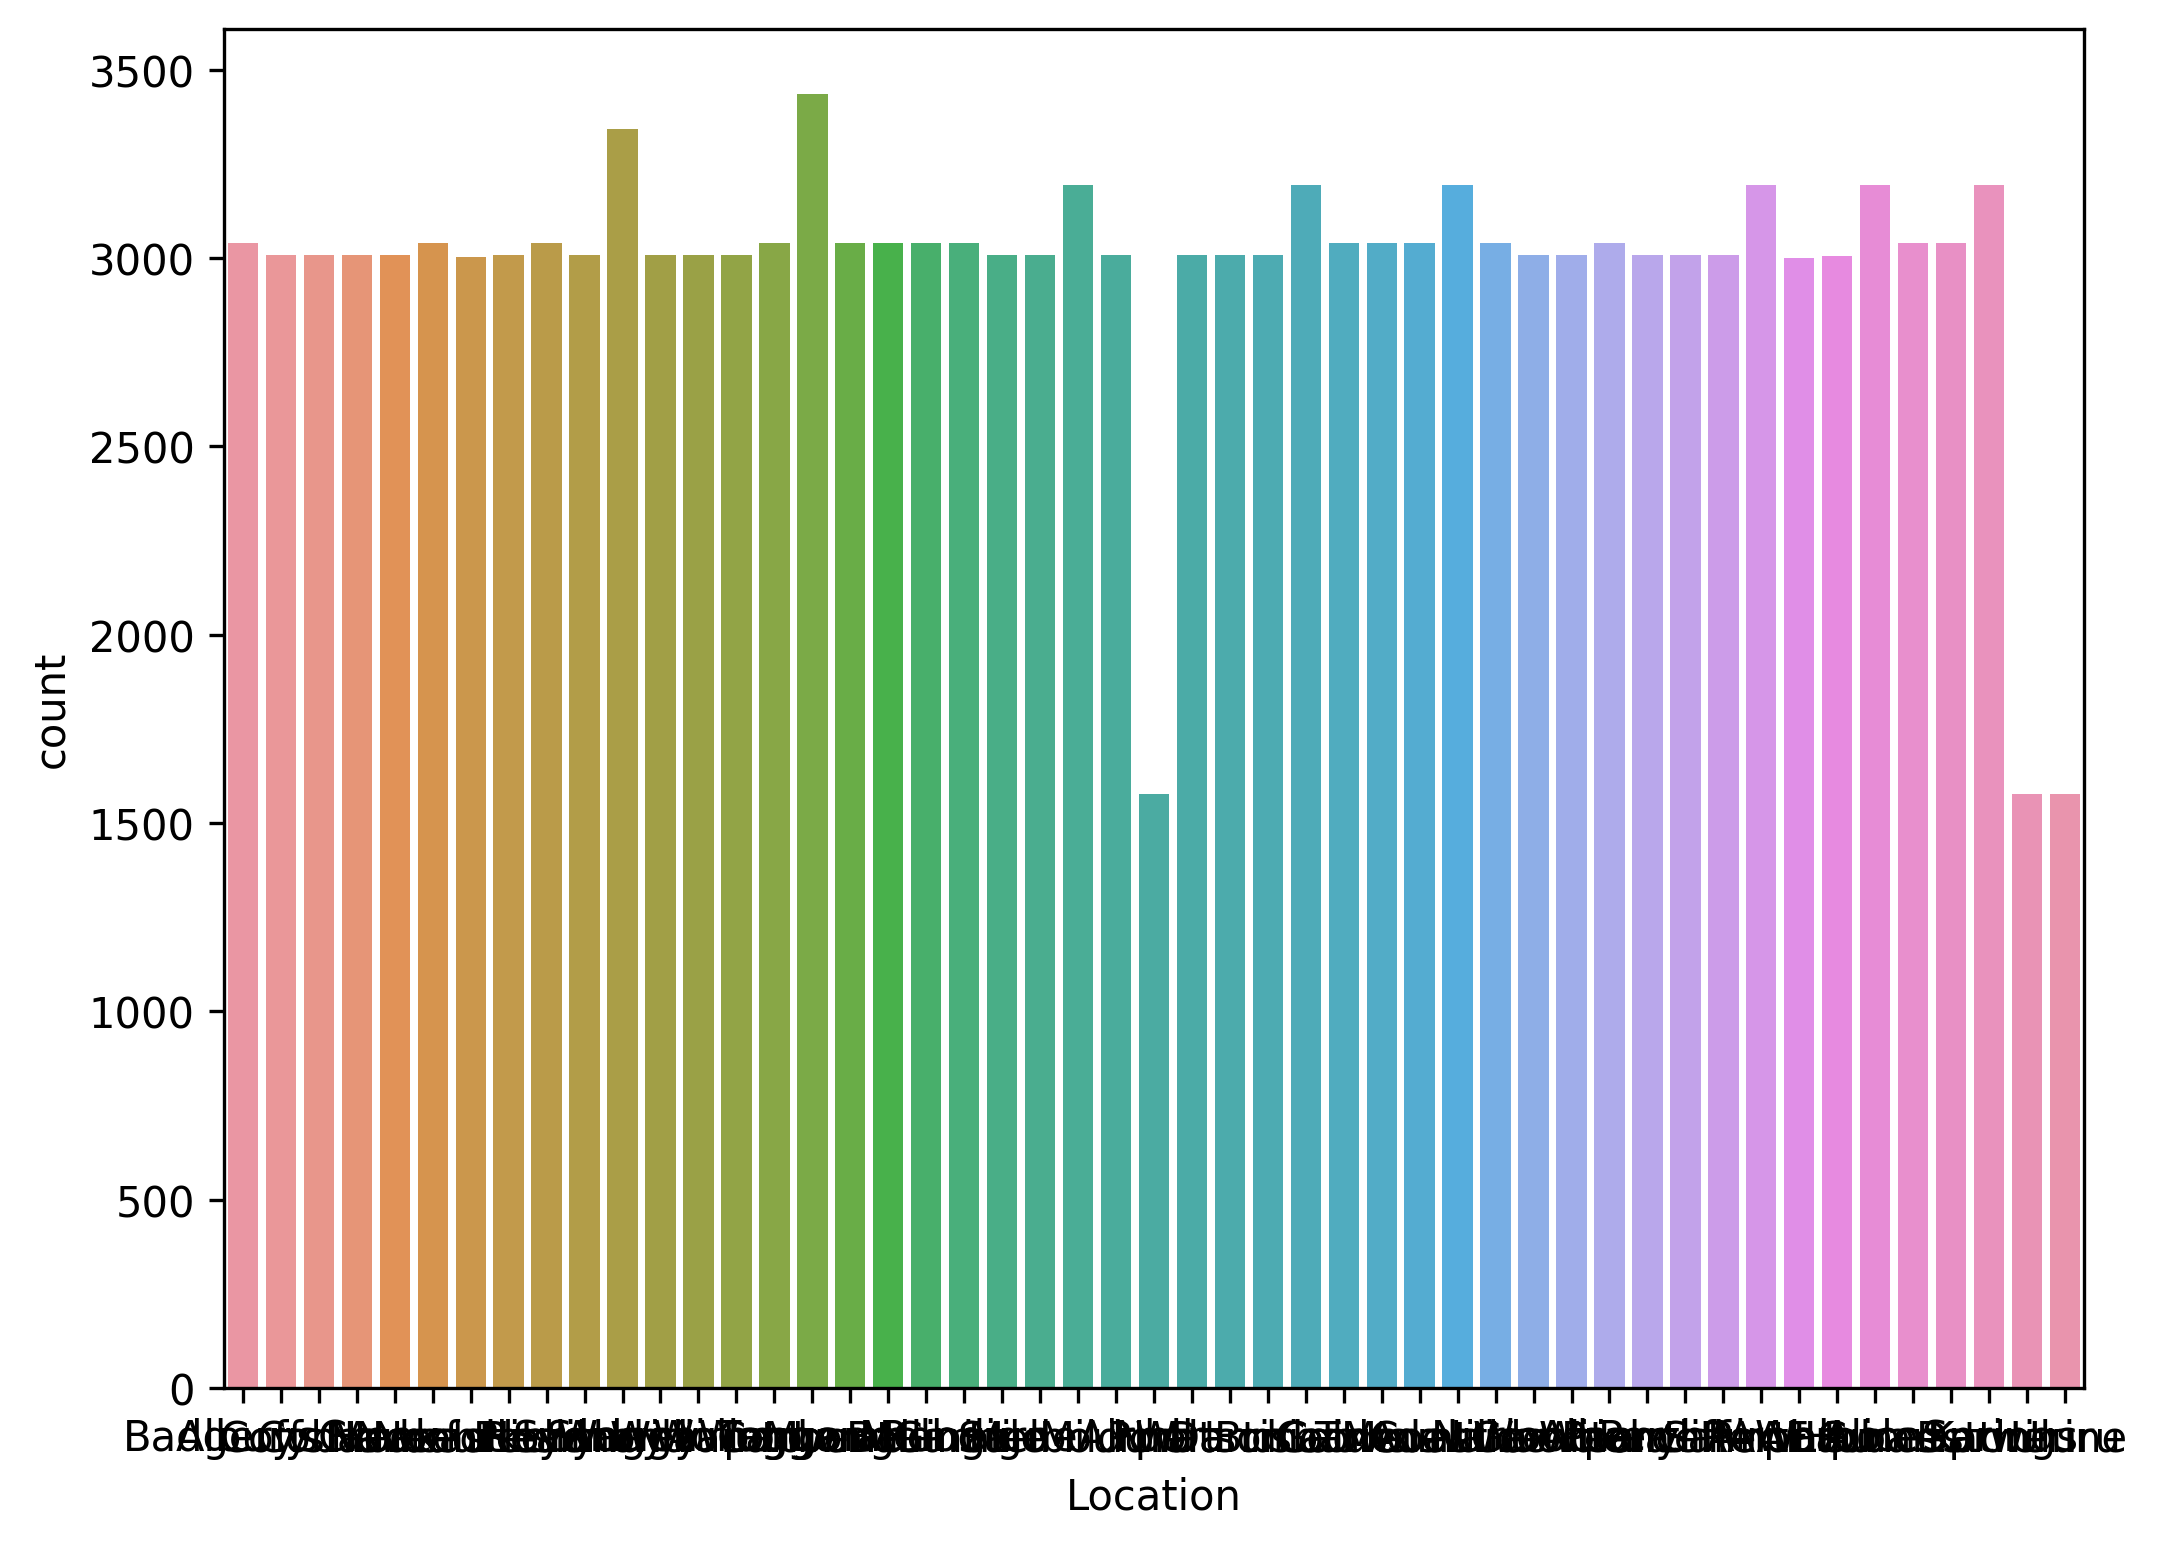

In [384]:
plt.figure(num=None, figsize=(8, 6), dpi=300)
sns.countplot(x='Location', data=df)

In [385]:
WindGustDir = df['WindGustDir'].value_counts()
WindGustDir

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

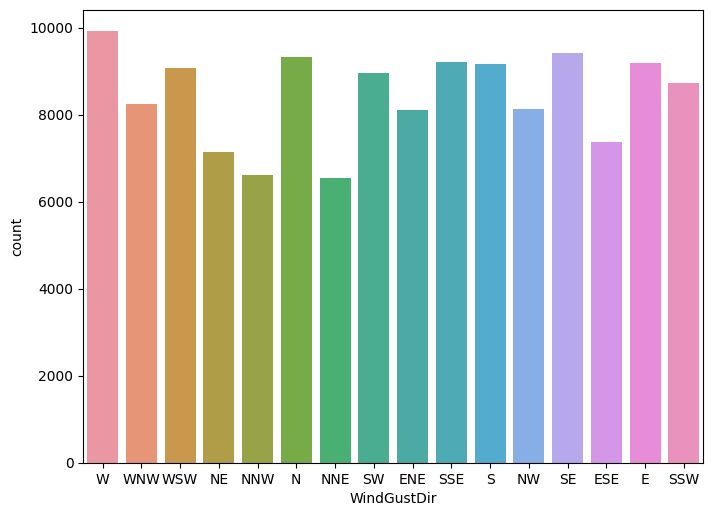

In [386]:
plt.figure(num=None, figsize=(8, 6), dpi=100)
sns.countplot(x='WindGustDir', data=df)

In [387]:
WindDir9am = df['WindDir9am'].value_counts()
WindDir9am

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

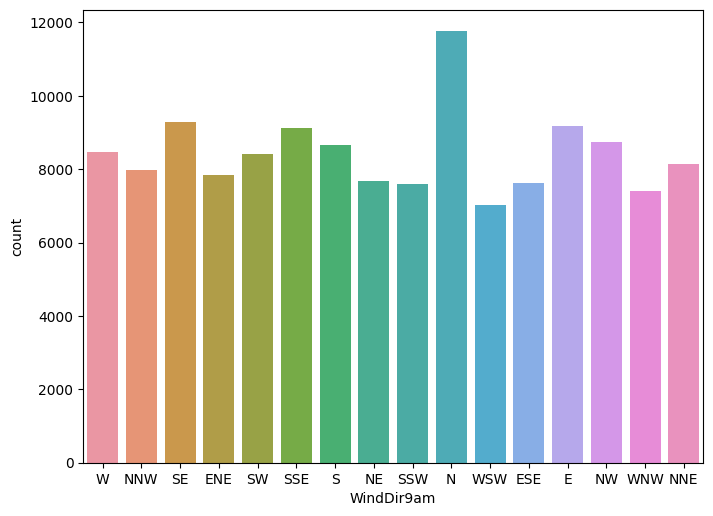

In [388]:
plt.figure(num=None, figsize=(8, 6), dpi=100)
sns.countplot(x='WindDir9am', data=df)

In [389]:
WindDir3pm = df['WindDir3pm'].value_counts()
WindDir3pm

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

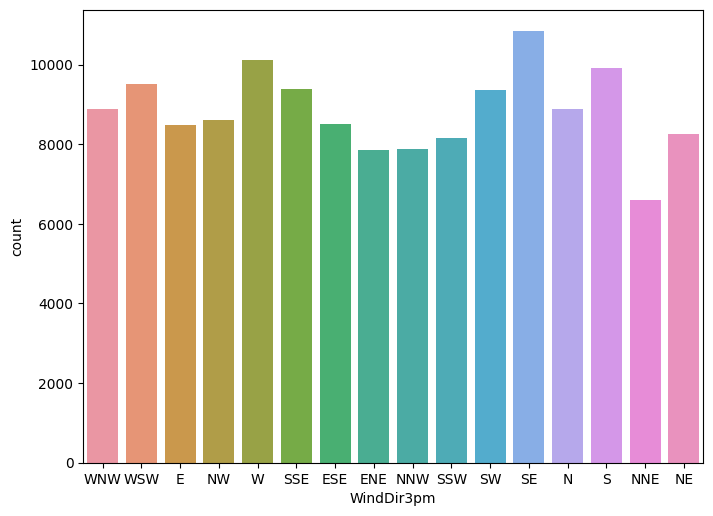

In [390]:
plt.figure(num=None, figsize=(8, 6), dpi=100)
sns.countplot(x='WindDir3pm', data=df)

In [391]:
RainToday = df['RainToday'].value_counts()
RainToday

No     110319
Yes     31880
Name: RainToday, dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

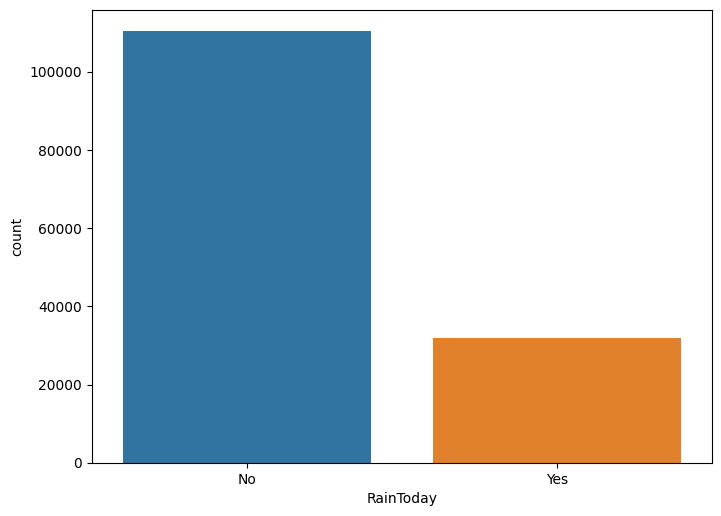

In [392]:
plt.figure(num=None, figsize=(8, 6), dpi=100)
sns.countplot(x='RainToday', data=df)

In [393]:
# zamena NaN vrednosti zeljenim metodom (mean, mode, median ili random sample imputation-om)

def impute_value(df, variable, method='random sample'):

    if method == 'mean':
        df[variable].fillna(df[variable].mean(), inplace=True)
    elif method == 'mode':
        df[variable].fillna(df[variable].mode()[0], inplace=True)
    elif method == 'median':
        df[variable + '_median'] = df[variable].fillna(df[variable].median())
    else:
        df[variable + '_random_sample'] = df[variable]
        random_sample = df[variable].dropna().sample(df[variable].isna().sum(), random_state=0)
        random_sample.index = df.loc[df[variable].isna()].index
        df.loc[df[variable].isna(), variable] = random_sample

### Zamena NaN vrednosti kategoričkih atributa vrednošću koja se javlja najveći broj puta u odgovarajućoj koloni

In [394]:
for feature in categorical:
    impute_value(df, feature, 'mode')

<AxesSubplot:>

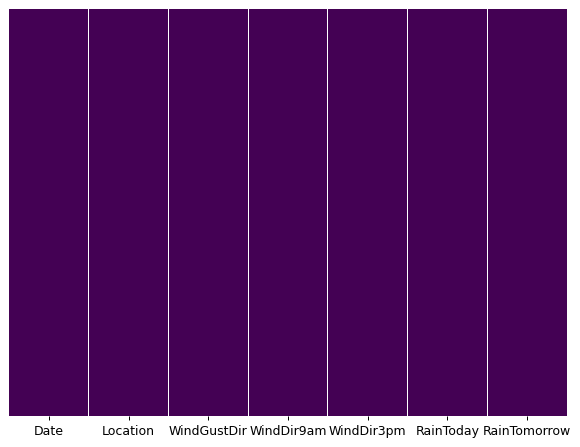

In [395]:
# Nakon zamene NaN vrednosti modom, ne sme biti NaN vrednosti ni u jednoj od kategorickih kolona
# ... provera iscrtavanjem heatmape

plt.figure(num=None, figsize=(8, 6), dpi=90)
sns.heatmap(df[categorical].isna(), yticklabels=False, cbar=False, cmap='viridis')

In [396]:
df[categorical].isna().mean()

Date            0.0
Location        0.0
WindGustDir     0.0
WindDir9am      0.0
WindDir3pm      0.0
RainToday       0.0
RainTomorrow    0.0
dtype: float64

### Zamena NaN vrednosti u kategoričkim atributima

In [397]:
# Funkcija koja na osnovu medjukvartalnog rastojanja odredjuje elemente van granica...
# ... (outlier-e) promenljive koja se prosledjuje kao argument (values)

def find_irq_outliers(values):
    
    outliers = []
    sorted_values = sorted(values)
    min, max = np.percentile(sorted_values, [25, 75])
    irq_difference = max - min
    upper_border = max + 1.5 * irq_difference
    lower_border = min - 1.5 * irq_difference

    for value in sorted_values:
        if value < lower_border or value > upper_border:
            outliers.append(value)
    return outliers
        
outlier_numeric_columns = []
for numerical_variable in numerical:
    if len(find_irq_outliers(df[numerical_variable])):
        outlier_numeric_columns.append(numerical_variable)

outlier_numeric_columns

[]

In [398]:
# Za sve promenljive numerickog tipa ispitati pojavljivanje elemenata van granica(outlier-a)
# Ukoliko u odgovarajucoj promenljivoj postoje outlier vrednosti...
# ... ispitati da li zamena outlier vrednosti median vrednoscu ili random sample imputation principom...
# ... unosi manju promenu standardne devijacije. U konacnom, zameniti nedostajuce vrednosti onim vrednostima...
# ... koje unose najmanju promenu standardne devijacije
# ... Ukoliko promenljiva ne sadrzi outlier-e zameniti nedostajuce vrednosti srednjom vrednoscu

for variable in numerical:
    if variable in outlier_numeric_columns:
        impute_value(df, variable, 'median')
        impute_value(df, variable)
        standard_deviation_old_values = df[variable].std()
        standard_deviation_median_values = df[variable + '_median'].std()
        standard_deviation_random_sample = df[variable + '_random_sample'].std()
        if abs(standard_deviation_median_values - standard_deviation_old_values) < abs(standard_deviation_random_sample - standard_deviation_old_values):
            df[variable] = df[variable + '_median']
        else:
            df[variable] = df[variable + '_random_sample']
        df.drop(columns=[variable + '_random_sample', variable + '_median'], inplace=True)

    else:
        impute_value(df, variable, 'mean')

### Nakon zamene NaN vrednosti u numeričkim kolonama, ne sme ostati ni jedna NaN vrednost u istim...

<AxesSubplot:>

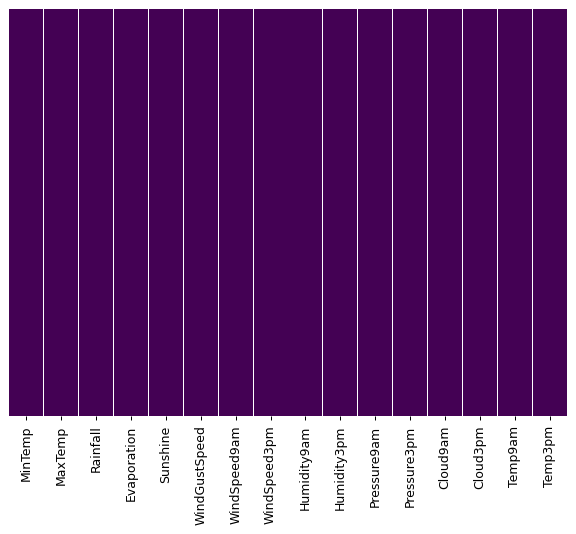

In [399]:
plt.figure(num=None, figsize=(8, 6), dpi=90)
sns.heatmap(df[numerical].isna(), yticklabels=False, cbar=False, cmap='viridis')

In [400]:
df[numerical].isna().mean()

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
dtype: float64

In [401]:
df.isna().mean()

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

<AxesSubplot:>

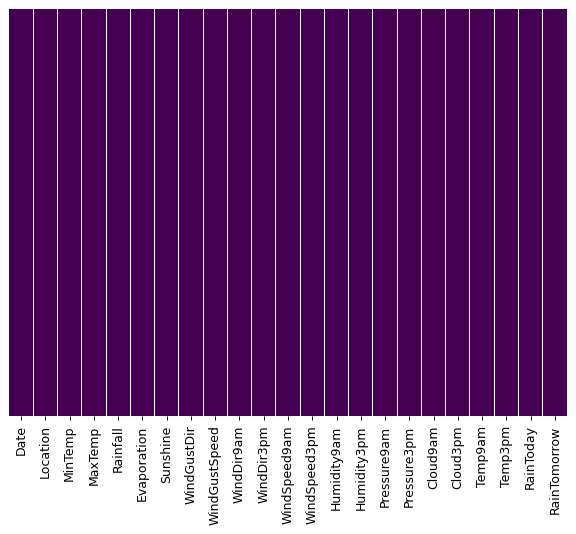

In [402]:
plt.figure(num=None, figsize=(8, 6), dpi=90)
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

### Da li je skup loše balansiran?

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

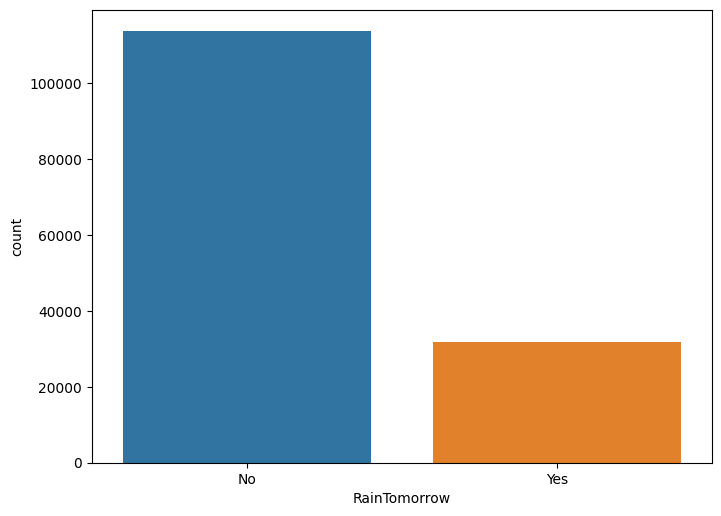

In [403]:
plt.figure(num=None, figsize=(8, 6), dpi=100)
sns.countplot(x='RainTomorrow', data=df)

In [404]:
print('Padala je kisa:', len(df.loc[df['RainTomorrow'] == 'Yes']))
print(f'U procentima: ', (len(df.loc[df['RainTomorrow'] == 'Yes']) / len(df)) * 100, '%')

Padala je kisa: 31877
U procentima:  21.914615701911178 %


In [405]:
print('Nije padala kisa:', len(df.loc[df['RainTomorrow'] == 'No']))
print('U procentima: ', (len(df.loc[df['RainTomorrow'] == 'No']) / len(df)) * 100, '%')

Nije padala kisa: 113583
U procentima:  78.08538429808883 %


In [406]:
# Mapiranje No vrednosti odredisnog atributa u 0 (nije padala kisa) i Yes vrednosti u 1 (padala je kisa)

df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)

### Skaliranje vrednosti

In [407]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7


In [408]:
scaler = MinMaxScaler()

for feature in numerical:
    df[feature] = scaler.fit_transform(df[[feature]])

In [409]:
# nakon skaliranja numerickih atributa

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704


- Numerički atributi skalirani, vrednosti odredišnog atributa **'RainTomorrow'** mapirane u 0 i 1 (0 za **No**, 1 za **Yes**)
- Još uvek nisu mapirane vrednosti kategoričkih atributa u numeričke vrednosti
- Još uvek nije izvršena selekcija atributa
- Skup je još uvek nebalansiran

In [410]:
X_train, X_test, Y_train, Y_test = train_test_split(df[numerical], df['RainTomorrow'], test_size=0.2)

In [411]:
X_train.shape

(116368, 16)

In [412]:
Y_train.shape

(116368,)

In [413]:
X_train, Y_train = shuffle(X_train, Y_train)

In [128]:
model = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

In [129]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [130]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
10474/10474 - 4s - loss: 0.4694 - accuracy: 0.7817 - val_loss: 0.4269 - val_accuracy: 0.7890
Epoch 2/50
10474/10474 - 3s - loss: 0.4093 - accuracy: 0.8127 - val_loss: 0.3961 - val_accuracy: 0.8262
Epoch 3/50
10474/10474 - 3s - loss: 0.3906 - accuracy: 0.8292 - val_loss: 0.3847 - val_accuracy: 0.8347
Epoch 4/50
10474/10474 - 3s - loss: 0.3826 - accuracy: 0.8342 - val_loss: 0.3790 - val_accuracy: 0.8358
Epoch 5/50
10474/10474 - 3s - loss: 0.3785 - accuracy: 0.8354 - val_loss: 0.3759 - val_accuracy: 0.8361
Epoch 6/50
10474/10474 - 3s - loss: 0.3761 - accuracy: 0.8361 - val_loss: 0.3745 - val_accuracy: 0.8379
Epoch 7/50
10474/10474 - 3s - loss: 0.3747 - accuracy: 0.8369 - val_loss: 0.3732 - val_accuracy: 0.8388
Epoch 8/50
10474/10474 - 3s - loss: 0.3737 - accuracy: 0.8369 - val_loss: 0.3722 - val_accuracy: 0.8396
Epoch 9/50
10474/10474 - 3s - loss: 0.3730 - accuracy: 0.8373 - val_loss: 0.3723 - val_accuracy: 0.8384
Epoch 10/50
10474/10474 - 3s - loss: 0.3724 - accuracy: 0.8374 -

In [131]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.78566736, 0.21433263],
       [0.3143207 , 0.6856794 ],
       [0.39877224, 0.60122776],
       ...,
       [0.82287055, 0.17712948],
       [0.8686265 , 0.13137354],
       [0.7339526 , 0.26604745]], dtype=float32)

In [132]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 1, 1, ..., 0, 0, 0])

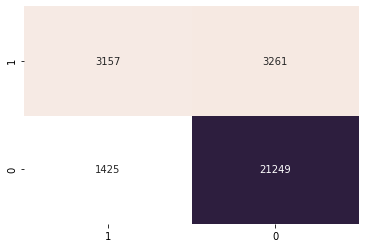

In [133]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, annot=True, cbar=False, fmt='d', cmap=cmap)
h_map.invert_yaxis()
h_map.invert_xaxis()

In [134]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22674
           1       0.69      0.49      0.57      6418

    accuracy                           0.84     29092
   macro avg       0.78      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [135]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8389247903203629

- Recall klase 1 (pada kiša), iznosi 0.48 i znato je manji od recall-a klase 0 (ne pada kiša) koji iznosi 0.87
- Ovakav rezultat mogao se i očekivati zbog loše ujednačenosti pomenutih klasa, odnosno znatno većeg prisustva opservacija u skupu podataka koje za vrednost odredišnog atributa imaju 0 (ne pada kiša)

### Selekcija promenljivih na osnovu matrice korelacije, odnosno Pirsonovog koeficijenta

In [63]:
def find_high_correlation_features(X, correlation_degree):
    
    correlated = X.corr()
    correlated_features = set()
    for i in range(len(correlated.columns)):
        for j in range(i + 1, len(correlated.columns)):
            if abs(correlated.iloc[i, j]) >= correlation_degree:
                value = abs(correlated.iloc[i, j])
                correlated_features.add(correlated.columns[j])
    
    return correlated_features

In [142]:
highly_correlated_features = find_high_correlation_features(X_train, 0.85)
highly_correlated_features ####

{'Pressure3pm', 'Temp3pm', 'Temp9am'}

<AxesSubplot:>

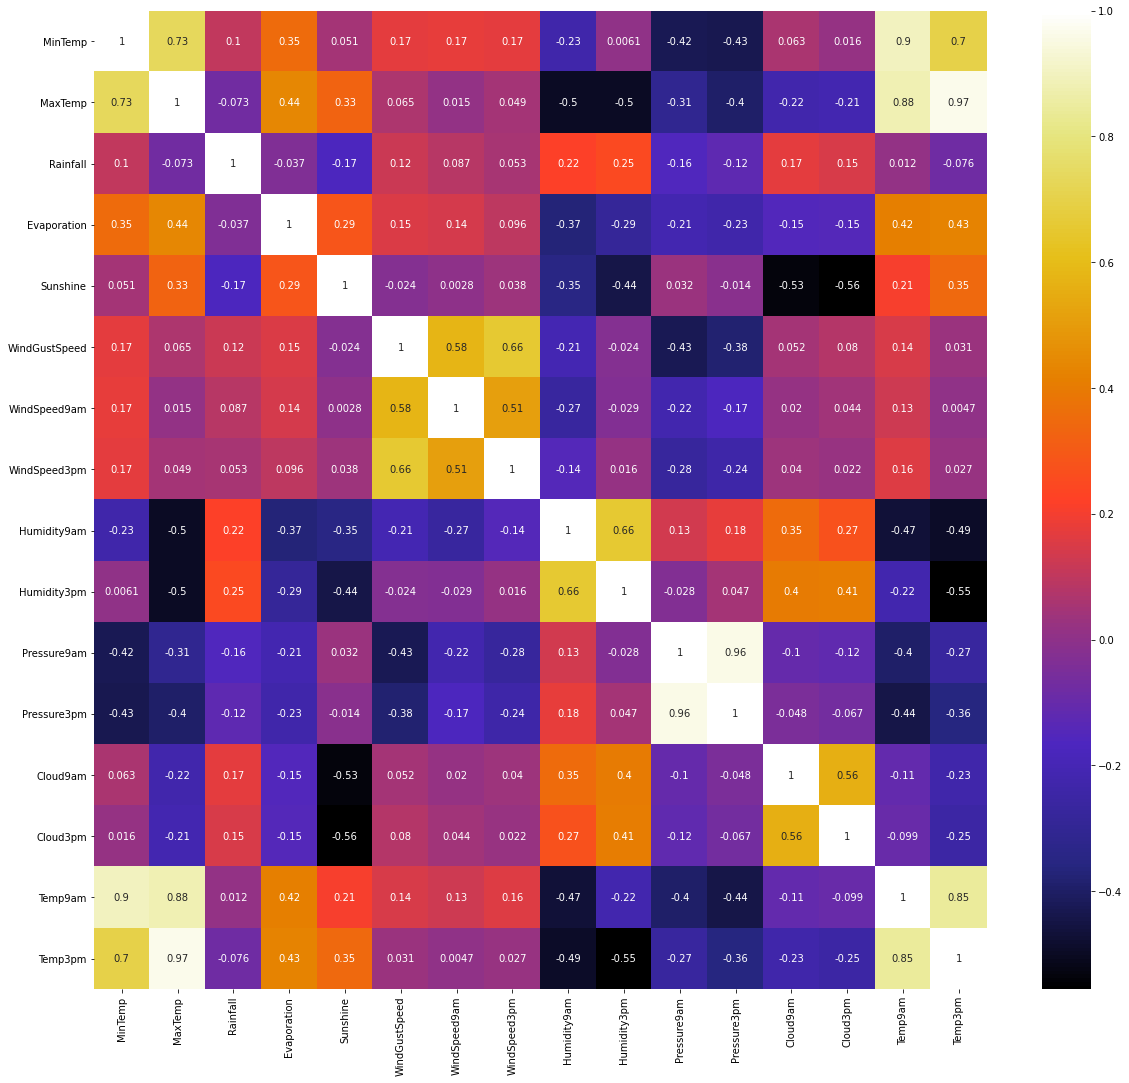

In [140]:
plt.figure(figsize=(20, 18))
sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.CMRmap)

### Da li će uklanjanje promenljivih za koje je algoritam otkrio da su u visokoj korelaciji sa ostalim promenljivama nešto promeniti?

In [162]:
X_train_drop_features = X_test.drop(columns=list(highly_correlated_features), axis=1)
X_test_drop_features = X_test.drop(columns=list(highly_correlated_features), axis=1)

In [158]:
X_train_drop_features.shape ####

(116368, 13)

In [159]:
model = Sequential([
    Dense(units=8, input_shape=(13, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

In [160]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [161]:
model.fit(x=X_train_drop_features, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
10474/10474 - 3s - loss: 0.4898 - accuracy: 0.7824 - val_loss: 0.4294 - val_accuracy: 0.8070
Epoch 2/50
10474/10474 - 3s - loss: 0.4093 - accuracy: 0.8112 - val_loss: 0.3932 - val_accuracy: 0.8248
Epoch 3/50
10474/10474 - 3s - loss: 0.3871 - accuracy: 0.8281 - val_loss: 0.3808 - val_accuracy: 0.8337
Epoch 4/50
10474/10474 - 3s - loss: 0.3787 - accuracy: 0.8334 - val_loss: 0.3756 - val_accuracy: 0.8369
Epoch 5/50
10474/10474 - 3s - loss: 0.3749 - accuracy: 0.8364 - val_loss: 0.3733 - val_accuracy: 0.8390
Epoch 6/50
10474/10474 - 3s - loss: 0.3729 - accuracy: 0.8375 - val_loss: 0.3714 - val_accuracy: 0.8386
Epoch 7/50
10474/10474 - 3s - loss: 0.3714 - accuracy: 0.8380 - val_loss: 0.3704 - val_accuracy: 0.8379
Epoch 8/50
10474/10474 - 3s - loss: 0.3707 - accuracy: 0.8387 - val_loss: 0.3698 - val_accuracy: 0.8388
Epoch 9/50
10474/10474 - 3s - loss: 0.3700 - accuracy: 0.8394 - val_loss: 0.3693 - val_accuracy: 0.8403
Epoch 10/50
10474/10474 - 3s - loss: 0.3694 - accuracy: 0.8397 -

In [164]:
predicted_values = model.predict(X_test_drop_features)
predicted_values

array([[0.80342555, 0.19657445],
       [0.32869095, 0.67130905],
       [0.46340424, 0.5365958 ],
       ...,
       [0.8221917 , 0.17780833],
       [0.876883  , 0.12311703],
       [0.6826772 , 0.31732273]], dtype=float32)

In [165]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 1, 1, ..., 0, 0, 0])

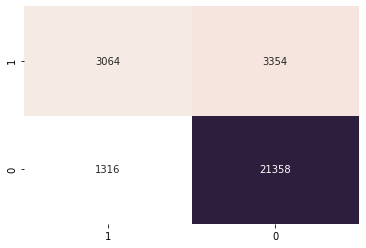

In [166]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, annot=True, cbar=False, fmt='d', cmap=cmap)
h_map.invert_yaxis()
h_map.invert_xaxis()

In [167]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22674
           1       0.70      0.48      0.57      6418

    accuracy                           0.84     29092
   macro avg       0.78      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



In [168]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8394747696961364

### Da li će dodavanje još jednog skrivenog sloja poboljšati situaciju?

In [119]:
model = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [120]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [121]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
9819/9819 - 3s - loss: 0.4404 - accuracy: 0.8060 - val_loss: 0.3916 - val_accuracy: 0.8268
Epoch 2/50
9819/9819 - 3s - loss: 0.3873 - accuracy: 0.8279 - val_loss: 0.3762 - val_accuracy: 0.8383
Epoch 3/50
9819/9819 - 3s - loss: 0.3783 - accuracy: 0.8344 - val_loss: 0.3721 - val_accuracy: 0.8421
Epoch 4/50
9819/9819 - 3s - loss: 0.3747 - accuracy: 0.8373 - val_loss: 0.3684 - val_accuracy: 0.8408
Epoch 5/50
9819/9819 - 3s - loss: 0.3727 - accuracy: 0.8384 - val_loss: 0.3667 - val_accuracy: 0.8421
Epoch 6/50
9819/9819 - 3s - loss: 0.3715 - accuracy: 0.8388 - val_loss: 0.3657 - val_accuracy: 0.8426
Epoch 7/50
9819/9819 - 3s - loss: 0.3707 - accuracy: 0.8394 - val_loss: 0.3649 - val_accuracy: 0.8434
Epoch 8/50
9819/9819 - 3s - loss: 0.3700 - accuracy: 0.8399 - val_loss: 0.3639 - val_accuracy: 0.8432
Epoch 9/50
9819/9819 - 3s - loss: 0.3696 - accuracy: 0.8397 - val_loss: 0.3633 - val_accuracy: 0.8433
Epoch 10/50
9819/9819 - 3s - loss: 0.3691 - accuracy: 0.8402 - val_loss: 0.3631 - 

In [122]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.76612276, 0.2338773 ],
       [0.94131094, 0.05868913],
       [0.99055475, 0.00944526],
       ...,
       [0.98006   , 0.01993999],
       [0.9042089 , 0.09579109],
       [0.92128056, 0.07871938]], dtype=float32)

In [123]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 0, 0, ..., 0, 0, 0])

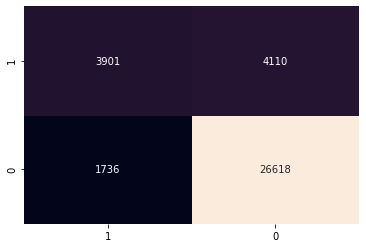

In [124]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [125]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     28354
           1       0.69      0.49      0.57      8011

    accuracy                           0.84     36365
   macro avg       0.78      0.71      0.74     36365
weighted avg       0.83      0.84      0.83     36365



In [65]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8318163068884917

### Nakon odbacivanja promenljivih sa visokim stepenom korelacije

In [169]:
model = Sequential([
    Dense(units=8, input_shape=(13, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [170]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [171]:
model.fit(x=X_train_drop_features, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
2619/2619 - 1s - loss: 0.5495 - accuracy: 0.7571 - val_loss: 0.5357 - val_accuracy: 0.7742
Epoch 2/50
2619/2619 - 1s - loss: 0.5212 - accuracy: 0.7855 - val_loss: 0.5363 - val_accuracy: 0.7742
Epoch 3/50
2619/2619 - 1s - loss: 0.5210 - accuracy: 0.7855 - val_loss: 0.5355 - val_accuracy: 0.7742
Epoch 4/50
2619/2619 - 1s - loss: 0.5209 - accuracy: 0.7855 - val_loss: 0.5357 - val_accuracy: 0.7742
Epoch 5/50
2619/2619 - 1s - loss: 0.5208 - accuracy: 0.7855 - val_loss: 0.5354 - val_accuracy: 0.7742
Epoch 6/50
2619/2619 - 1s - loss: 0.5207 - accuracy: 0.7855 - val_loss: 0.5360 - val_accuracy: 0.7742
Epoch 7/50
2619/2619 - 1s - loss: 0.5206 - accuracy: 0.7855 - val_loss: 0.5354 - val_accuracy: 0.7742
Epoch 8/50
2619/2619 - 1s - loss: 0.5206 - accuracy: 0.7855 - val_loss: 0.5357 - val_accuracy: 0.7742
Epoch 9/50
2619/2619 - 1s - loss: 0.5206 - accuracy: 0.7855 - val_loss: 0.5357 - val_accuracy: 0.7742
Epoch 10/50
2619/2619 - 1s - loss: 0.5205 - accuracy: 0.7855 - val_loss: 0.5361 - 

In [172]:
predicted_values = model.predict(X_test_drop_features)
predicted_values

array([[0.8110759 , 0.18892407],
       [0.7791713 , 0.22082873],
       [0.7805562 , 0.2194438 ],
       ...,
       [0.78643197, 0.21356805],
       [0.78784716, 0.21215285],
       [0.7940726 , 0.20592733]], dtype=float32)

In [173]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 0, 0, ..., 0, 0, 0])

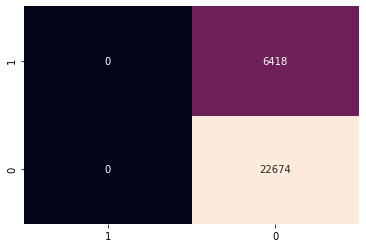

In [174]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [175]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     22674
           1       0.00      0.00      0.00      6418

    accuracy                           0.78     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.61      0.78      0.68     29092



/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [176]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.7793895228928915

### Da li se menja situacija nakon mapiranja vrednosti kategoričkih promenljivih u numeričke vrednosti?

In [179]:
dummies = pd.get_dummies(df[categorical])

In [180]:
df_numeric_scaled_dummy_encoded = pd.DataFrame(df[numerical], columns=df[numerical].columns)

In [181]:
dummy = pd.get_dummies(df[categorical].drop('RainTomorrow', axis=1))

In [182]:
df_numeric_scaled_dummy_encoded = pd.concat([df_numeric_scaled_dummy_encoded, dummy], axis=1, join='inner')
df_numeric_scaled_dummy_encoded['RainTomorrow'] = df['RainTomorrow']

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(df_numeric_scaled_dummy_encoded.drop('RainTomorrow', axis=1), df_numeric_scaled_dummy_encoded['RainTomorrow'], test_size=0.2)

In [184]:
X_train, Y_train = shuffle(X_train, Y_train)

In [185]:
X_train.shape

(116368, 3551)

In [186]:
model = Sequential([
    Dense(units=8, input_shape=(3551, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

In [187]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [188]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
10474/10474 - 6s - loss: 0.4327 - accuracy: 0.8076 - val_loss: 0.3860 - val_accuracy: 0.8316
Epoch 2/50
10474/10474 - 5s - loss: 0.3661 - accuracy: 0.8397 - val_loss: 0.3588 - val_accuracy: 0.8433
Epoch 3/50
10474/10474 - 5s - loss: 0.3465 - accuracy: 0.8491 - val_loss: 0.3499 - val_accuracy: 0.8476
Epoch 4/50
10474/10474 - 5s - loss: 0.3368 - accuracy: 0.8528 - val_loss: 0.3456 - val_accuracy: 0.8492
Epoch 5/50
10474/10474 - 5s - loss: 0.3313 - accuracy: 0.8553 - val_loss: 0.3452 - val_accuracy: 0.8495
Epoch 6/50
10474/10474 - 5s - loss: 0.3281 - accuracy: 0.8560 - val_loss: 0.3455 - val_accuracy: 0.8500
Epoch 7/50
10474/10474 - 5s - loss: 0.3261 - accuracy: 0.8573 - val_loss: 0.3470 - val_accuracy: 0.8494
Epoch 8/50
10474/10474 - 5s - loss: 0.3249 - accuracy: 0.8575 - val_loss: 0.3501 - val_accuracy: 0.8484
Epoch 9/50
10474/10474 - 5s - loss: 0.3240 - accuracy: 0.8579 - val_loss: 0.3481 - val_accuracy: 0.8500
Epoch 10/50
10474/10474 - 5s - loss: 0.3234 - accuracy: 0.8587 -

In [189]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.80500114, 0.1949988 ],
       [0.6406925 , 0.35930762],
       [0.8408173 , 0.15918273],
       ...,
       [0.96313673, 0.03686329],
       [0.97449285, 0.02550717],
       [0.98537374, 0.01462625]], dtype=float32)

In [190]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 0, 0, ..., 0, 0, 0])

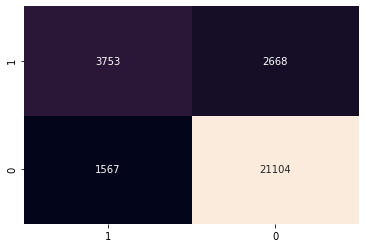

In [191]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [192]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     22671
           1       0.71      0.58      0.64      6421

    accuracy                           0.85     29092
   macro avg       0.80      0.76      0.77     29092
weighted avg       0.85      0.85      0.85     29092



In [193]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8544273339749759

### Nakon ukljanjanja promenljivih sa visokim stepenom korelacije...

In [194]:
highly_correlated_features = find_high_correlation_features(X_train, 0.85)
highly_correlated_features

{'Pressure3pm', 'RainToday_Yes', 'Temp3pm', 'Temp9am'}

In [195]:
X_train_drop_features = X_test.drop(columns=list(highly_correlated_features), axis=1)
X_test_drop_features = X_test.drop(columns=list(highly_correlated_features), axis=1)

In [196]:
X_train_drop_features.shape

(29092, 3547)

In [197]:
model = Sequential([
    Dense(units=8, input_shape=(3547, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

In [198]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [199]:
model.fit(x=X_train_drop_features, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
2619/2619 - 2s - loss: 0.5537 - accuracy: 0.7717 - val_loss: 0.5227 - val_accuracy: 0.7842
Epoch 2/50
2619/2619 - 1s - loss: 0.5271 - accuracy: 0.7792 - val_loss: 0.5227 - val_accuracy: 0.7842
Epoch 3/50
2619/2619 - 1s - loss: 0.5250 - accuracy: 0.7792 - val_loss: 0.5226 - val_accuracy: 0.7842
Epoch 4/50
2619/2619 - 1s - loss: 0.5229 - accuracy: 0.7792 - val_loss: 0.5224 - val_accuracy: 0.7842
Epoch 5/50
2619/2619 - 1s - loss: 0.5206 - accuracy: 0.7792 - val_loss: 0.5224 - val_accuracy: 0.7842
Epoch 6/50
2619/2619 - 1s - loss: 0.5180 - accuracy: 0.7792 - val_loss: 0.5222 - val_accuracy: 0.7842
Epoch 7/50
2619/2619 - 1s - loss: 0.5151 - accuracy: 0.7792 - val_loss: 0.5222 - val_accuracy: 0.7842
Epoch 8/50
2619/2619 - 1s - loss: 0.5119 - accuracy: 0.7792 - val_loss: 0.5225 - val_accuracy: 0.7842
Epoch 9/50
2619/2619 - 1s - loss: 0.5081 - accuracy: 0.7792 - val_loss: 0.5232 - val_accuracy: 0.7842
Epoch 10/50
2619/2619 - 1s - loss: 0.5041 - accuracy: 0.7792 - val_loss: 0.5239 - 

In [200]:
predicted_values = model.predict(X_test_drop_features)
predicted_values

array([[0.90029126, 0.0997087 ],
       [0.82242507, 0.17757496],
       [0.9427218 , 0.05727823],
       ...,
       [0.75887144, 0.24112855],
       [0.8924422 , 0.1075578 ],
       [0.72333163, 0.27666834]], dtype=float32)

In [201]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 0, 0, ..., 0, 0, 0])

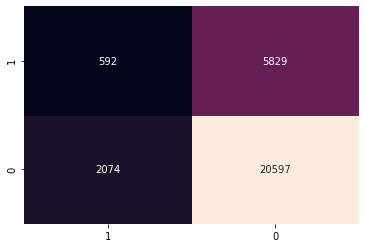

In [202]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [203]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     22671
           1       0.22      0.09      0.13      6421

    accuracy                           0.73     29092
   macro avg       0.50      0.50      0.48     29092
weighted avg       0.66      0.73      0.68     29092



In [204]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.7283445620789221

### Da li se menja situacija dodavanjem još jednog skrivenog sloja?

In [48]:
model = Sequential([
    Dense(units=8, input_shape=(3551, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [49]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
9819/9819 - 6s - loss: 0.4205 - accuracy: 0.8151 - val_loss: 0.3705 - val_accuracy: 0.8359
Epoch 2/50
9819/9819 - 5s - loss: 0.3518 - accuracy: 0.8467 - val_loss: 0.3535 - val_accuracy: 0.8459
Epoch 3/50
9819/9819 - 5s - loss: 0.3364 - accuracy: 0.8535 - val_loss: 0.3510 - val_accuracy: 0.8455
Epoch 4/50
9819/9819 - 5s - loss: 0.3299 - accuracy: 0.8559 - val_loss: 0.3525 - val_accuracy: 0.8456
Epoch 5/50
9819/9819 - 5s - loss: 0.3270 - accuracy: 0.8577 - val_loss: 0.3575 - val_accuracy: 0.8460
Epoch 6/50
9819/9819 - 5s - loss: 0.3253 - accuracy: 0.8586 - val_loss: 0.3556 - val_accuracy: 0.8465
Epoch 7/50
9819/9819 - 5s - loss: 0.3245 - accuracy: 0.8592 - val_loss: 0.3564 - val_accuracy: 0.8446
Epoch 8/50
9819/9819 - 5s - loss: 0.3236 - accuracy: 0.8597 - val_loss: 0.3610 - val_accuracy: 0.8452
Epoch 9/50
9819/9819 - 5s - loss: 0.3233 - accuracy: 0.8595 - val_loss: 0.3585 - val_accuracy: 0.8461
Epoch 10/50
9819/9819 - 5s - loss: 0.3227 - accuracy: 0.8600 - val_loss: 0.3590 - 

In [51]:
predicted_values = model.predict(X_test)
predicted_values

array([[9.9047381e-01, 9.5261652e-03],
       [2.9253051e-01, 7.0746958e-01],
       [9.7997916e-01, 2.0020863e-02],
       ...,
       [3.0898488e-01, 6.9101506e-01],
       [9.9999988e-01, 1.6903762e-07],
       [9.9976617e-01, 2.3379830e-04]], dtype=float32)

In [52]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 1, 0, ..., 1, 0, 0])

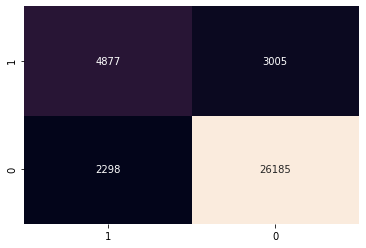

In [53]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [54]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     28483
           1       0.68      0.62      0.65      7882

    accuracy                           0.85     36365
   macro avg       0.79      0.77      0.78     36365
weighted avg       0.85      0.85      0.85     36365



In [55]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8541729685136807

### Nakon uklanjanja promenljivih sa visokim stepenom korelacije...

In [205]:
model = Sequential([
    Dense(units=8, input_shape=(3547, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [206]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [207]:
model.fit(x=X_train_drop_features, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
2619/2619 - 2s - loss: 0.5432 - accuracy: 0.7782 - val_loss: 0.5218 - val_accuracy: 0.7842
Epoch 2/50
2619/2619 - 1s - loss: 0.5261 - accuracy: 0.7792 - val_loss: 0.5219 - val_accuracy: 0.7842
Epoch 3/50
2619/2619 - 1s - loss: 0.5228 - accuracy: 0.7792 - val_loss: 0.5215 - val_accuracy: 0.7842
Epoch 4/50
2619/2619 - 1s - loss: 0.5187 - accuracy: 0.7792 - val_loss: 0.5221 - val_accuracy: 0.7842
Epoch 5/50
2619/2619 - 1s - loss: 0.5138 - accuracy: 0.7792 - val_loss: 0.5228 - val_accuracy: 0.7842
Epoch 6/50
2619/2619 - 1s - loss: 0.5075 - accuracy: 0.7792 - val_loss: 0.5245 - val_accuracy: 0.7842
Epoch 7/50
2619/2619 - 1s - loss: 0.4994 - accuracy: 0.7792 - val_loss: 0.5285 - val_accuracy: 0.7842
Epoch 8/50
2619/2619 - 1s - loss: 0.4899 - accuracy: 0.7792 - val_loss: 0.5353 - val_accuracy: 0.7842
Epoch 9/50
2619/2619 - 1s - loss: 0.4807 - accuracy: 0.7796 - val_loss: 0.5447 - val_accuracy: 0.7818
Epoch 10/50
2619/2619 - 1s - loss: 0.4727 - accuracy: 0.7809 - val_loss: 0.5571 - 

In [208]:
predicted_values = model.predict(X_test_drop_features)
predicted_values

array([[0.773689  , 0.22631104],
       [0.8359391 , 0.1640609 ],
       [0.8620756 , 0.13792439],
       ...,
       [0.6698137 , 0.3301863 ],
       [0.90472156, 0.09527846],
       [0.9226292 , 0.07737086]], dtype=float32)

In [209]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 0, 0, ..., 0, 0, 0])

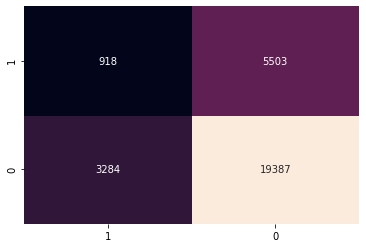

In [210]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [211]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     22671
           1       0.22      0.14      0.17      6421

    accuracy                           0.70     29092
   macro avg       0.50      0.50      0.49     29092
weighted avg       0.66      0.70      0.67     29092



In [212]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.6979582015674413

### Rešiti problem loše balansiranosti skupa

In [304]:
random_over_sampler = RandomOverSampler(random_state=0)
X_oversampled, Y_oversampled = random_over_sampler.fit_resample(df.drop('RainTomorrow', axis=1), df['RainTomorrow'])

In [305]:
from collections import Counter

counter = Counter(Y_oversampled.values)
counter.most_common()

[(0, 113583), (1, 113583)]

In [306]:
df_balanced = pd.DataFrame(X_oversampled.values, columns=X_oversampled.columns)

In [307]:
df_balanced['RainTomorrow'] = Y_oversampled 

### Pre mapiranja vrednosti kategoričkih atributa u numeričke vrednosti (obučavanje neuronske mreže samo sa numeričkim atributima)

In [308]:
# konvertovati sve numericke kolone u tip 'float64' (nakon promene algoritma za oversampling tipovi numerickih...
# kolona su iz nekog razloga konvertovani u object)

for feature in numerical:
    df_balanced[feature] = df_balanced[feature].astype('float64')

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(df_balanced[numerical], df_balanced['RainTomorrow'], test_size=0.2)

In [310]:
X_train, Y_train = shuffle(X_train, Y_train)

In [311]:
X_train.shape

(181732, 16)

In [257]:
model = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

In [258]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [259]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
16356/16356 - 5s - loss: 0.5477 - accuracy: 0.7419 - val_loss: 0.5008 - val_accuracy: 0.7552
Epoch 2/50
16356/16356 - 5s - loss: 0.4885 - accuracy: 0.7637 - val_loss: 0.4857 - val_accuracy: 0.7598
Epoch 3/50
16356/16356 - 5s - loss: 0.4800 - accuracy: 0.7678 - val_loss: 0.4805 - val_accuracy: 0.7645
Epoch 4/50
16356/16356 - 5s - loss: 0.4767 - accuracy: 0.7696 - val_loss: 0.4778 - val_accuracy: 0.7652
Epoch 5/50
16356/16356 - 5s - loss: 0.4750 - accuracy: 0.7710 - val_loss: 0.4765 - val_accuracy: 0.7663
Epoch 6/50
16356/16356 - 5s - loss: 0.4737 - accuracy: 0.7717 - val_loss: 0.4749 - val_accuracy: 0.7675
Epoch 7/50
16356/16356 - 5s - loss: 0.4727 - accuracy: 0.7723 - val_loss: 0.4737 - val_accuracy: 0.7679
Epoch 8/50
16356/16356 - 5s - loss: 0.4719 - accuracy: 0.7730 - val_loss: 0.4730 - val_accuracy: 0.7689
Epoch 9/50
16356/16356 - 5s - loss: 0.4713 - accuracy: 0.7733 - val_loss: 0.4724 - val_accuracy: 0.7702
Epoch 10/50
16356/16356 - 5s - loss: 0.4709 - accuracy: 0.7738 -

In [260]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.76178527, 0.23821473],
       [0.3263788 , 0.6736212 ],
       [0.24800494, 0.7519951 ],
       ...,
       [0.3315709 , 0.6684291 ],
       [0.70713073, 0.2928692 ],
       [0.14265832, 0.85734165]], dtype=float32)

In [261]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 1, 1, ..., 1, 0, 1])

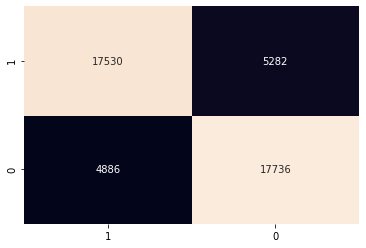

In [262]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [263]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78     22622
           1       0.78      0.77      0.78     22812

    accuracy                           0.78     45434
   macro avg       0.78      0.78      0.78     45434
weighted avg       0.78      0.78      0.78     45434



In [264]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.7762028436853458

### Da li će se nešto promeniti nakon balansiranja skupa i ukljanjanja promenljivih koje imaju najviši stepen korelacije (uključiti samo numeričke promenljive)

In [265]:
highly_correlated_features = find_high_correlation_features(X_train, 0.85)
highly_correlated_features

{'Pressure3pm', 'Temp3pm', 'Temp9am'}

<AxesSubplot:>

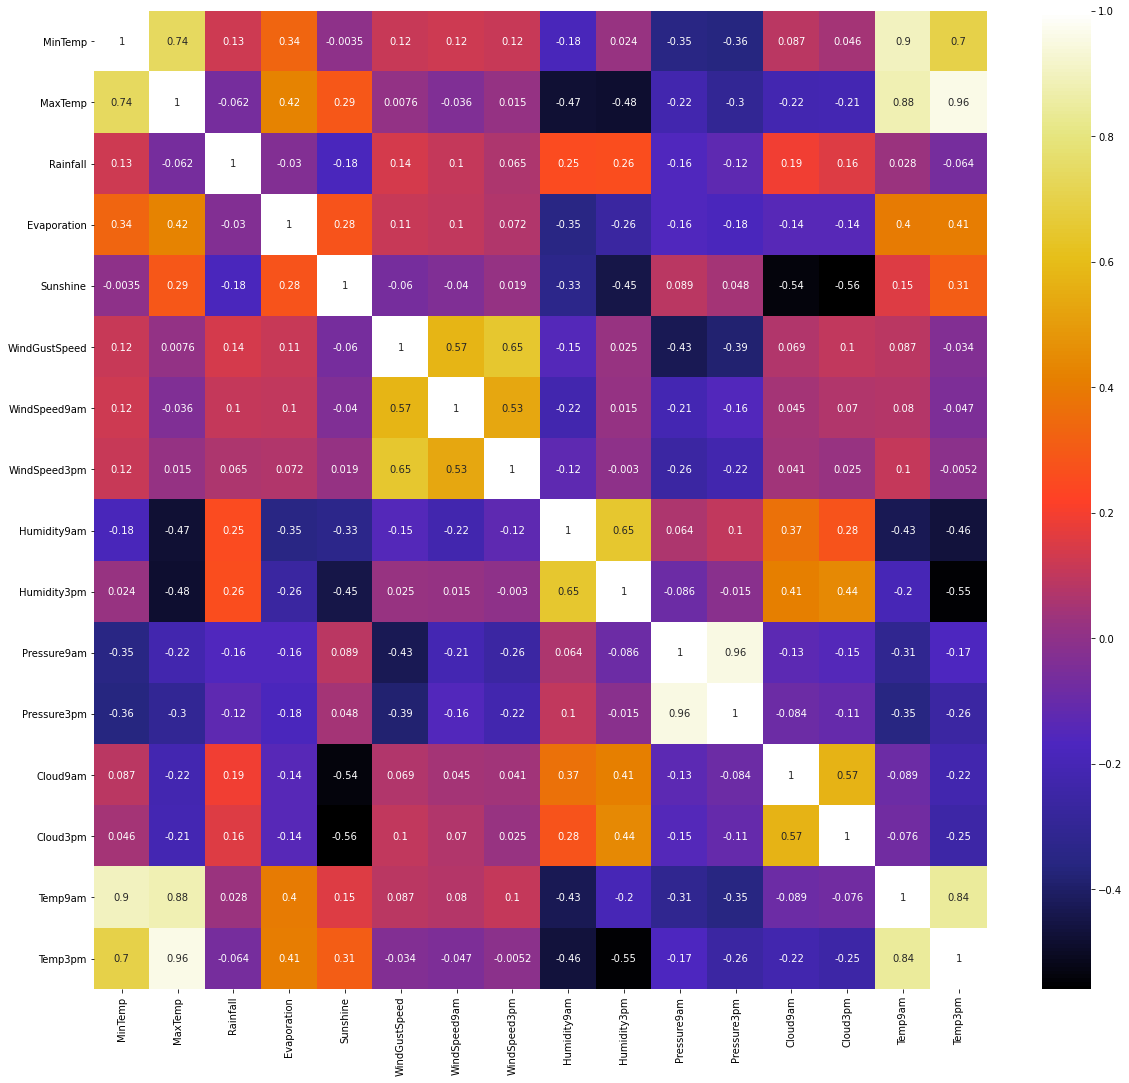

In [266]:
plt.figure(figsize=(20, 18))
sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.CMRmap)

In [47]:
X_train_drop_features = X_test.drop(columns=['Pressure3pm', 'Temp3pm', 'Temp9am'], axis=1)
X_test_drop_features = X_test.drop(columns=['Pressure3pm', 'Temp3pm', 'Temp9am'], axis=1)

In [48]:
X_train_drop_features.shape

(45434, 13)

In [269]:
model = Sequential([
    Dense(units=8, input_shape=(13, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

In [270]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [271]:
model.fit(x=X_train_drop_features, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
4089/4089 - 1s - loss: 0.6945 - accuracy: 0.5034 - val_loss: 0.6942 - val_accuracy: 0.4806
Epoch 2/50
4089/4089 - 1s - loss: 0.6933 - accuracy: 0.5021 - val_loss: 0.6940 - val_accuracy: 0.4846
Epoch 3/50
4089/4089 - 1s - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6941 - val_accuracy: 0.4811
Epoch 4/50
4089/4089 - 1s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.4793
Epoch 5/50
4089/4089 - 1s - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6938 - val_accuracy: 0.4795
Epoch 6/50
4089/4089 - 1s - loss: 0.6932 - accuracy: 0.5041 - val_loss: 0.6938 - val_accuracy: 0.4811
Epoch 7/50
4089/4089 - 1s - loss: 0.6932 - accuracy: 0.5041 - val_loss: 0.6937 - val_accuracy: 0.4839
Epoch 8/50
4089/4089 - 1s - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6939 - val_accuracy: 0.4751
Epoch 9/50
4089/4089 - 1s - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6938 - val_accuracy: 0.4782
Epoch 10/50
4089/4089 - 1s - loss: 0.6931 - accuracy: 0.5046 - val_loss: 0.6938 - 

In [272]:
predicted_values = model.predict(X_test_drop_features)
predicted_values

array([[0.50460935, 0.49539065],
       [0.5045559 , 0.4954441 ],
       [0.50481457, 0.49518546],
       ...,
       [0.5077822 , 0.49221778],
       [0.50557   , 0.4944301 ],
       [0.50526804, 0.49473196]], dtype=float32)

In [273]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 0, 0, ..., 0, 0, 0])

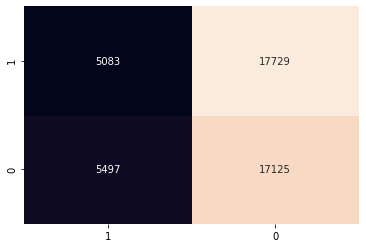

In [274]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [275]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.49      0.76      0.60     22622
           1       0.48      0.22      0.30     22812

    accuracy                           0.49     45434
   macro avg       0.49      0.49      0.45     45434
weighted avg       0.49      0.49      0.45     45434



In [276]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.48879693621516923

### Nakon dodavanja još jednog skrivenog sloja (bez izbacivanja promenljivih sa visokim stepenom korelacije)

In [49]:
model = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [50]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
16356/16356 - 6s - loss: 0.5307 - accuracy: 0.7359 - val_loss: 0.4923 - val_accuracy: 0.7602
Epoch 2/50
16356/16356 - 5s - loss: 0.4808 - accuracy: 0.7660 - val_loss: 0.4815 - val_accuracy: 0.7628
Epoch 3/50
16356/16356 - 5s - loss: 0.4749 - accuracy: 0.7695 - val_loss: 0.4796 - val_accuracy: 0.7651
Epoch 4/50
16356/16356 - 5s - loss: 0.4724 - accuracy: 0.7713 - val_loss: 0.4766 - val_accuracy: 0.7679
Epoch 5/50
16356/16356 - 5s - loss: 0.4710 - accuracy: 0.7728 - val_loss: 0.4753 - val_accuracy: 0.7688
Epoch 6/50
16356/16356 - 5s - loss: 0.4700 - accuracy: 0.7730 - val_loss: 0.4763 - val_accuracy: 0.7669
Epoch 7/50
16356/16356 - 5s - loss: 0.4691 - accuracy: 0.7739 - val_loss: 0.4749 - val_accuracy: 0.7673
Epoch 8/50
16356/16356 - 5s - loss: 0.4685 - accuracy: 0.7743 - val_loss: 0.4730 - val_accuracy: 0.7701
Epoch 9/50
16356/16356 - 5s - loss: 0.4679 - accuracy: 0.7744 - val_loss: 0.4732 - val_accuracy: 0.7685
Epoch 10/50
16356/16356 - 5s - loss: 0.4673 - accuracy: 0.7753 -

In [52]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.05215554, 0.94784445],
       [0.48893863, 0.51106143],
       [0.04283623, 0.95716375],
       ...,
       [0.91450083, 0.08549915],
       [0.8226912 , 0.17730874],
       [0.05806351, 0.94193643]], dtype=float32)

In [53]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([1, 1, 1, ..., 0, 0, 1])

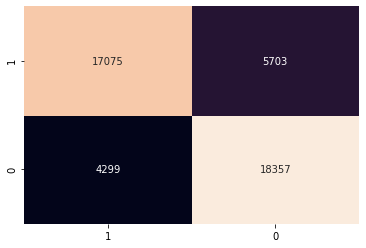

In [54]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [55]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.81      0.79     22656
           1       0.80      0.75      0.77     22778

    accuracy                           0.78     45434
   macro avg       0.78      0.78      0.78     45434
weighted avg       0.78      0.78      0.78     45434



In [56]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.7798564951358014

### Nakon odbacivanja promenljivih sa visokim stepenom korelacije u odnosu na ostale promenljive...

In [57]:
model = Sequential([
    Dense(units=8, input_shape=(13, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [58]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(x=X_train_drop_features, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
4089/4089 - 2s - loss: 0.6955 - accuracy: 0.4978 - val_loss: 0.6933 - val_accuracy: 0.5068
Epoch 2/50
4089/4089 - 1s - loss: 0.6936 - accuracy: 0.4976 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/50
4089/4089 - 1s - loss: 0.6934 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5009
Epoch 4/50
4089/4089 - 1s - loss: 0.6934 - accuracy: 0.4981 - val_loss: 0.6934 - val_accuracy: 0.5009
Epoch 5/50
4089/4089 - 1s - loss: 0.6933 - accuracy: 0.5016 - val_loss: 0.6935 - val_accuracy: 0.5033
Epoch 6/50
4089/4089 - 1s - loss: 0.6933 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.4991
Epoch 7/50
4089/4089 - 1s - loss: 0.6933 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5018
Epoch 8/50
4089/4089 - 1s - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6934 - val_accuracy: 0.4980
Epoch 9/50
4089/4089 - 1s - loss: 0.6933 - accuracy: 0.5003 - val_loss: 0.6933 - val_accuracy: 0.5015
Epoch 10/50
4089/4089 - 1s - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6933 - 

In [60]:
predicted_values = model.predict(X_test_drop_features)
predicted_values

array([[0.48253798, 0.51746196],
       [0.5006385 , 0.49936152],
       [0.47691712, 0.5230829 ],
       ...,
       [0.4855808 , 0.5144192 ],
       [0.49420545, 0.5057946 ],
       [0.4733492 , 0.5266508 ]], dtype=float32)

In [61]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([1, 0, 1, ..., 1, 1, 1])

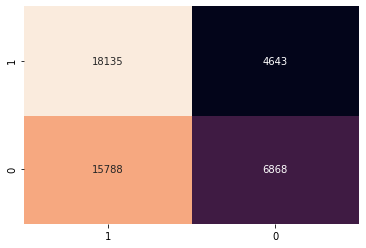

In [62]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [63]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.60      0.30      0.40     22656
           1       0.53      0.80      0.64     22778

    accuracy                           0.55     45434
   macro avg       0.57      0.55      0.52     45434
weighted avg       0.57      0.55      0.52     45434



In [64]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.5503147422635031

### Mapirati vrednosti kategoričkih atributa u numeričke vrednosti

In [50]:
dummy = pd.get_dummies(df_balanced[categorical].drop('RainTomorrow', axis=1))
dummy

,Date_2007-11-01,Date_2007-11-02,Date_2007-11-03,Date_2007-11-04,Date_2007-11-05,Date_2007-11-06,Date_2007-11-07,Date_2007-11-08,Date_2007-11-09,Date_2007-11-10,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227161,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
227162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
227163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
227164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df_balanced_dummy_encoded = pd.concat([df_balanced[numerical], dummy], axis=1, join='inner')
df_balanced_dummy_encoded['RainTomorrow'] = df_balanced['RainTomorrow']

In [52]:
df_balanced_dummy_encoded['RainTomorrow']

0         0
1         0
2         0
3         0
4         0
         ..
227161    1
227162    1
227163    1
227164    1
227165    1
Name: RainTomorrow, Length: 227166, dtype: int64

In [53]:
df_balanced_dummy_encoded.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'RainToday_No',
       'RainToday_Yes', 'RainTomorrow'],
      dtype='object', length=3552)

In [54]:
# Konvertovati sve kolone u 'float64' tip

# features = list(df_balanced_dummy_encoded.columns.values)
# features.remove('RainTomorrow')

# for feature in features:
#     df_balanced_dummy_encoded[feature] = df_balanced_dummy_encoded[feature].astype('float64')

# df_balanced_dummy_encoded['WindDir3pm_SSE'].dtype
non_numeric = []
for feature in df_balanced_dummy_encoded.columns:
    if df_balanced_dummy_encoded[feature].dtype == 'object':
        non_numeric.append(feature)
        
non_numeric

[]

In [55]:
df_balanced['RainTomorrow'].dtype

dtype('int64')

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(df_balanced_dummy_encoded.drop('RainTomorrow', axis=1), df_balanced_dummy_encoded['RainTomorrow'], test_size=0.2)

In [57]:
X_train, Y_train = shuffle(X_train, Y_train)

In [58]:
X_train.shape

(181732, 3551)

In [74]:
model = Sequential([
    Dense(units=8, input_shape=(3551, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

In [75]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
16356/16356 - 10s - loss: 0.5193 - accuracy: 0.7490 - val_loss: 0.4590 - val_accuracy: 0.7858
Epoch 2/50
16356/16356 - 8s - loss: 0.4374 - accuracy: 0.7983 - val_loss: 0.4362 - val_accuracy: 0.7969
Epoch 3/50
16356/16356 - 8s - loss: 0.4191 - accuracy: 0.8087 - val_loss: 0.4310 - val_accuracy: 0.8024
Epoch 4/50
16356/16356 - 9s - loss: 0.4116 - accuracy: 0.8122 - val_loss: 0.4280 - val_accuracy: 0.8035
Epoch 5/50
16356/16356 - 9s - loss: 0.4082 - accuracy: 0.8140 - val_loss: 0.4267 - val_accuracy: 0.8048
Epoch 6/50
16356/16356 - 8s - loss: 0.4064 - accuracy: 0.8154 - val_loss: 0.4271 - val_accuracy: 0.8044
Epoch 7/50
16356/16356 - 8s - loss: 0.4054 - accuracy: 0.8160 - val_loss: 0.4282 - val_accuracy: 0.8036
Epoch 8/50
16356/16356 - 8s - loss: 0.4046 - accuracy: 0.8170 - val_loss: 0.4279 - val_accuracy: 0.8023
Epoch 9/50
16356/16356 - 8s - loss: 0.4041 - accuracy: 0.8170 - val_loss: 0.4273 - val_accuracy: 0.8040
Epoch 10/50
16356/16356 - 9s - loss: 0.4036 - accuracy: 0.8173 

In [77]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.37447515, 0.6255249 ],
       [0.38510343, 0.6148966 ],
       [0.00721679, 0.9927832 ],
       ...,
       [0.48548305, 0.514517  ],
       [0.19295757, 0.8070424 ],
       [0.00175846, 0.99824154]], dtype=float32)

In [78]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([1, 1, 1, ..., 1, 1, 1])

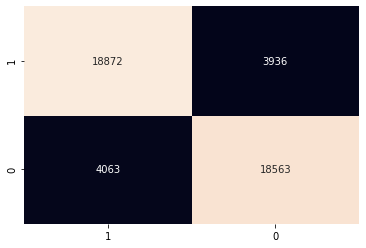

In [79]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [80]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     22626
           1       0.82      0.83      0.83     22808

    accuracy                           0.82     45434
   macro avg       0.82      0.82      0.82     45434
weighted avg       0.82      0.82      0.82     45434



In [81]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8239424219747326

### Testirati i odbaciti promenljive koji imaju visok stepen korelacije prema drugim promenljivama

In [64]:
#####
highly_correlated_features = find_high_correlation_features(X_train, 0.85)
highly_correlated_features

{'Pressure3pm', 'RainToday_Yes', 'Temp3pm', 'Temp9am'}

In [54]:
X_train_drop_features = X_test.drop(columns=['Pressure3pm', 'RainToday_Yes', 'Temp3pm', 'Temp9am'], axis=1)
X_test_drop_features = X_test.drop(columns=['Pressure3pm', 'RainToday_Yes', 'Temp3pm', 'Temp9am'], axis=1)

In [55]:
X_train_drop_features.shape

(45434, 3547)

In [56]:
len(X_train_drop_features.columns)

3547

In [85]:
model = Sequential([
    Dense(units=8, input_shape=(3547, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

In [86]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
model.fit(x=X_train_drop_features, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
4089/4089 - 2s - loss: 0.6935 - accuracy: 0.4944 - val_loss: 0.6933 - val_accuracy: 0.5053
Epoch 2/50
4089/4089 - 2s - loss: 0.6921 - accuracy: 0.5184 - val_loss: 0.6929 - val_accuracy: 0.5088
Epoch 3/50
4089/4089 - 2s - loss: 0.6900 - accuracy: 0.5408 - val_loss: 0.6930 - val_accuracy: 0.5077
Epoch 4/50
4089/4089 - 2s - loss: 0.6869 - accuracy: 0.5617 - val_loss: 0.6935 - val_accuracy: 0.5086
Epoch 5/50
4089/4089 - 2s - loss: 0.6829 - accuracy: 0.5795 - val_loss: 0.6943 - val_accuracy: 0.5117
Epoch 6/50
4089/4089 - 2s - loss: 0.6780 - accuracy: 0.5961 - val_loss: 0.6951 - val_accuracy: 0.5112
Epoch 7/50
4089/4089 - 2s - loss: 0.6725 - accuracy: 0.6088 - val_loss: 0.6964 - val_accuracy: 0.5079
Epoch 8/50
4089/4089 - 2s - loss: 0.6664 - accuracy: 0.6213 - val_loss: 0.6985 - val_accuracy: 0.5073
Epoch 9/50
4089/4089 - 2s - loss: 0.6599 - accuracy: 0.6282 - val_loss: 0.7014 - val_accuracy: 0.5086
Epoch 10/50
4089/4089 - 2s - loss: 0.6535 - accuracy: 0.6360 - val_loss: 0.7056 - 

In [88]:
predicted_values = model.predict(X_test_drop_features)
predicted_values

array([[0.78577113, 0.21422893],
       [0.48709008, 0.51290995],
       [0.7141918 , 0.2858082 ],
       ...,
       [0.8896153 , 0.11038468],
       [0.80203146, 0.19796853],
       [0.74443465, 0.25556535]], dtype=float32)

In [89]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 1, 0, ..., 0, 0, 0])

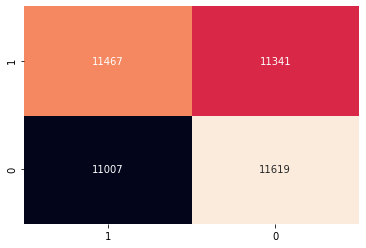

In [90]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [91]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.51      0.51      0.51     22626
           1       0.51      0.50      0.51     22808

    accuracy                           0.51     45434
   macro avg       0.51      0.51      0.51     45434
weighted avg       0.51      0.51      0.51     45434



In [92]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.5081216709952898

### Nakon dodavanja još jednog skrivenog sloja...

In [ ]:
######

In [57]:
model = Sequential([
    Dense(units=8, input_shape=(3551, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [58]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
16356/16356 - 10s - loss: 0.4805 - accuracy: 0.7713 - val_loss: 0.4298 - val_accuracy: 0.7979
Epoch 2/50
16356/16356 - 9s - loss: 0.4200 - accuracy: 0.8077 - val_loss: 0.4181 - val_accuracy: 0.8065
Epoch 3/50
16356/16356 - 9s - loss: 0.4105 - accuracy: 0.8129 - val_loss: 0.4149 - val_accuracy: 0.8069
Epoch 4/50
16356/16356 - 9s - loss: 0.4049 - accuracy: 0.8159 - val_loss: 0.4118 - val_accuracy: 0.8089
Epoch 5/50
16356/16356 - 8s - loss: 0.3992 - accuracy: 0.8190 - val_loss: 0.4077 - val_accuracy: 0.8129
Epoch 6/50
16356/16356 - 9s - loss: 0.3929 - accuracy: 0.8234 - val_loss: 0.4018 - val_accuracy: 0.8173
Epoch 7/50
16356/16356 - 9s - loss: 0.3857 - accuracy: 0.8271 - val_loss: 0.3968 - val_accuracy: 0.8199
Epoch 8/50
16356/16356 - 9s - loss: 0.3783 - accuracy: 0.8314 - val_loss: 0.3921 - val_accuracy: 0.8236
Epoch 9/50
16356/16356 - 8s - loss: 0.3708 - accuracy: 0.8355 - val_loss: 0.3863 - val_accuracy: 0.8272
Epoch 10/50
16356/16356 - 8s - loss: 0.3633 - accuracy: 0.8386 

In [60]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.94719094, 0.0528091 ],
       [0.06038984, 0.9396101 ],
       [0.03640132, 0.96359867],
       ...,
       [0.98389846, 0.01610154],
       [0.9961747 , 0.00382525],
       [0.22561158, 0.7743885 ]], dtype=float32)

In [61]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 1, 1, ..., 0, 0, 1])

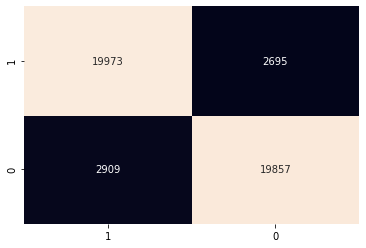

In [62]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [63]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     22766
           1       0.87      0.88      0.88     22668

    accuracy                           0.88     45434
   macro avg       0.88      0.88      0.88     45434
weighted avg       0.88      0.88      0.88     45434



In [64]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8766562486243782

### Nakon selekcije promenljivih...

In [65]:
model = Sequential([
    Dense(units=8, input_shape=(3547, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [66]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.fit(x=X_train_drop_features, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
4089/4089 - 2s - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6932 - val_accuracy: 0.5055
Epoch 2/50
4089/4089 - 2s - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6935 - val_accuracy: 0.4886
Epoch 3/50
4089/4089 - 2s - loss: 0.6914 - accuracy: 0.5300 - val_loss: 0.6933 - val_accuracy: 0.5081
Epoch 4/50
4089/4089 - 2s - loss: 0.6880 - accuracy: 0.5579 - val_loss: 0.6938 - val_accuracy: 0.5084
Epoch 5/50
4089/4089 - 2s - loss: 0.6817 - accuracy: 0.5778 - val_loss: 0.6959 - val_accuracy: 0.5097
Epoch 6/50
4089/4089 - 2s - loss: 0.6719 - accuracy: 0.6016 - val_loss: 0.7011 - val_accuracy: 0.5053
Epoch 7/50
4089/4089 - 2s - loss: 0.6591 - accuracy: 0.6187 - val_loss: 0.7084 - val_accuracy: 0.5092
Epoch 8/50
4089/4089 - 2s - loss: 0.6463 - accuracy: 0.6334 - val_loss: 0.7200 - val_accuracy: 0.5037
Epoch 9/50
4089/4089 - 2s - loss: 0.6346 - accuracy: 0.6455 - val_loss: 0.7351 - val_accuracy: 0.4971
Epoch 10/50
4089/4089 - 2s - loss: 0.6244 - accuracy: 0.6535 - val_loss: 0.7479 - 

In [68]:
predicted_values = model.predict(X_test_drop_features)
predicted_values

array([[0.00179887, 0.99820113],
       [0.9333823 , 0.06661769],
       [0.5881907 , 0.4118093 ],
       ...,
       [0.22993019, 0.77006984],
       [0.838641  , 0.16135901],
       [0.17320362, 0.82679635]], dtype=float32)

In [69]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([1, 0, 0, ..., 1, 0, 1])

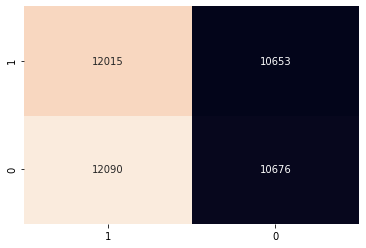

In [70]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [71]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.50      0.47      0.48     22766
           1       0.50      0.53      0.51     22668

    accuracy                           0.50     45434
   macro avg       0.50      0.50      0.50     45434
weighted avg       0.50      0.50      0.50     45434



In [72]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.49942774133908524

### Dodati možda još jedan skriveni sloj?

In [57]:
model = Sequential([
    Dense(units=8, input_shape=(3551, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [58]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
16356/16356 - 12s - loss: 0.4719 - accuracy: 0.7749 - val_loss: 0.4378 - val_accuracy: 0.7950
Epoch 2/50
16356/16356 - 10s - loss: 0.4169 - accuracy: 0.8083 - val_loss: 0.4242 - val_accuracy: 0.8031
Epoch 3/50
16356/16356 - 10s - loss: 0.4070 - accuracy: 0.8142 - val_loss: 0.4174 - val_accuracy: 0.8062
Epoch 4/50
16356/16356 - 10s - loss: 0.3981 - accuracy: 0.8203 - val_loss: 0.4119 - val_accuracy: 0.8119
Epoch 5/50
16356/16356 - 10s - loss: 0.3881 - accuracy: 0.8257 - val_loss: 0.4029 - val_accuracy: 0.8166
Epoch 6/50
16356/16356 - 10s - loss: 0.3767 - accuracy: 0.8310 - val_loss: 0.3944 - val_accuracy: 0.8214
Epoch 7/50
16356/16356 - 10s - loss: 0.3642 - accuracy: 0.8379 - val_loss: 0.3880 - val_accuracy: 0.8263
Epoch 8/50
16356/16356 - 9s - loss: 0.3511 - accuracy: 0.8450 - val_loss: 0.3777 - val_accuracy: 0.8326
Epoch 9/50
16356/16356 - 10s - loss: 0.3375 - accuracy: 0.8532 - val_loss: 0.3720 - val_accuracy: 0.8366
Epoch 10/50
16356/16356 - 10s - loss: 0.3245 - accuracy:

In [60]:
predicted_values = model.predict(X_test)
predicted_values

array([[7.6739430e-02, 9.2326057e-01],
       [9.0663880e-02, 9.0933615e-01],
       [9.9601138e-01, 3.9886562e-03],
       ...,
       [9.9911720e-01, 8.8277919e-04],
       [9.5034522e-01, 4.9654823e-02],
       [9.9960381e-01, 3.9618090e-04]], dtype=float32)

In [61]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([1, 1, 0, ..., 0, 0, 0])

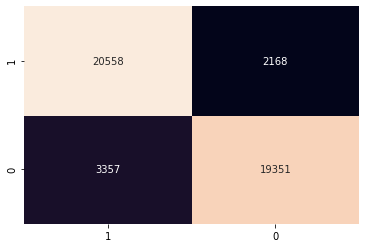

In [62]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [63]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88     22708
           1       0.86      0.90      0.88     22726

    accuracy                           0.88     45434
   macro avg       0.88      0.88      0.88     45434
weighted avg       0.88      0.88      0.88     45434



In [64]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8783950345556192

### Nakon uklanjanja promenljivih sa visokom korelacijom...

In [65]:
model = Sequential([
    Dense(units=8, input_shape=(3547, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [66]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.fit(x=X_train_drop_features, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
4089/4089 - 3s - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6937 - val_accuracy: 0.4952
Epoch 2/50
4089/4089 - 2s - loss: 0.6927 - accuracy: 0.5168 - val_loss: 0.6936 - val_accuracy: 0.4980
Epoch 3/50
4089/4089 - 2s - loss: 0.6900 - accuracy: 0.5413 - val_loss: 0.6945 - val_accuracy: 0.4987
Epoch 4/50
4089/4089 - 2s - loss: 0.6826 - accuracy: 0.5695 - val_loss: 0.6981 - val_accuracy: 0.5062
Epoch 5/50
4089/4089 - 2s - loss: 0.6692 - accuracy: 0.5996 - val_loss: 0.7080 - val_accuracy: 0.4930
Epoch 6/50
4089/4089 - 3s - loss: 0.6526 - accuracy: 0.6238 - val_loss: 0.7229 - val_accuracy: 0.4894
Epoch 7/50
4089/4089 - 3s - loss: 0.6370 - accuracy: 0.6402 - val_loss: 0.7379 - val_accuracy: 0.5011
Epoch 8/50
4089/4089 - 3s - loss: 0.6235 - accuracy: 0.6551 - val_loss: 0.7495 - val_accuracy: 0.5022
Epoch 9/50
4089/4089 - 2s - loss: 0.6113 - accuracy: 0.6665 - val_loss: 0.7651 - val_accuracy: 0.5018
Epoch 10/50
4089/4089 - 2s - loss: 0.5995 - accuracy: 0.6787 - val_loss: 0.7923 - 

In [68]:
predicted_values = model.predict(X_test_drop_features)
predicted_values

array([[0.7763657 , 0.22363432],
       [0.3562875 , 0.6437125 ],
       [0.88897544, 0.11102458],
       ...,
       [0.07489141, 0.92510855],
       [0.1952026 , 0.8047974 ],
       [0.7472798 , 0.25272024]], dtype=float32)

In [69]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 1, 0, ..., 1, 1, 0])

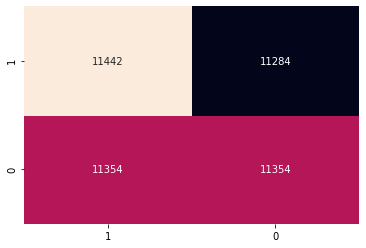

In [70]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [71]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     22708
           1       0.50      0.50      0.50     22726

    accuracy                           0.50     45434
   macro avg       0.50      0.50      0.50     45434
weighted avg       0.50      0.50      0.50     45434



In [72]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.5017387859312409

### ...јоš jedan skriveni sloj...

In [73]:
model = Sequential([
    Dense(units=8, input_shape=(3551, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [74]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
16356/16356 - 11s - loss: 0.4646 - accuracy: 0.7792 - val_loss: 0.4372 - val_accuracy: 0.7949
Epoch 2/50
16356/16356 - 10s - loss: 0.4164 - accuracy: 0.8094 - val_loss: 0.4237 - val_accuracy: 0.8051
Epoch 3/50
16356/16356 - 11s - loss: 0.4064 - accuracy: 0.8149 - val_loss: 0.4170 - val_accuracy: 0.8064
Epoch 4/50
16356/16356 - 10s - loss: 0.3924 - accuracy: 0.8209 - val_loss: 0.4038 - val_accuracy: 0.8142
Epoch 5/50
16356/16356 - 10s - loss: 0.3756 - accuracy: 0.8293 - val_loss: 0.3947 - val_accuracy: 0.8194
Epoch 6/50
16356/16356 - 10s - loss: 0.3608 - accuracy: 0.8358 - val_loss: 0.3905 - val_accuracy: 0.8205
Epoch 7/50
16356/16356 - 10s - loss: 0.3489 - accuracy: 0.8436 - val_loss: 0.3794 - val_accuracy: 0.8307
Epoch 8/50
16356/16356 - 10s - loss: 0.3394 - accuracy: 0.8497 - val_loss: 0.3766 - val_accuracy: 0.8323
Epoch 9/50
16356/16356 - 10s - loss: 0.3305 - accuracy: 0.8556 - val_loss: 0.3730 - val_accuracy: 0.8354
Epoch 10/50
16356/16356 - 10s - loss: 0.3221 - accuracy

In [76]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.04642566, 0.95357436],
       [0.00721497, 0.9927851 ],
       [0.459081  , 0.540919  ],
       ...,
       [0.99794346, 0.00205649],
       [0.9534197 , 0.04658028],
       [0.99884135, 0.00115867]], dtype=float32)

In [77]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([1, 1, 1, ..., 0, 0, 0])

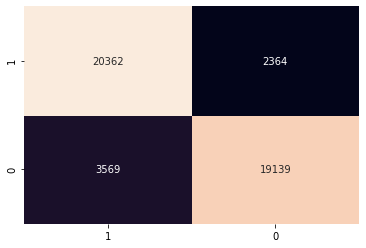

In [78]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [79]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.84      0.87     22708
           1       0.85      0.90      0.87     22726

    accuracy                           0.87     45434
   macro avg       0.87      0.87      0.87     45434
weighted avg       0.87      0.87      0.87     45434



In [80]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8694149755689572

### još jedan sloj...

In [59]:
model = Sequential([
    Dense(units=8, input_shape=(3551, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [60]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
16356/16356 - 12s - loss: 0.4608 - accuracy: 0.7819 - val_loss: 0.4204 - val_accuracy: 0.8071
Epoch 2/50
16356/16356 - 11s - loss: 0.3962 - accuracy: 0.8207 - val_loss: 0.3981 - val_accuracy: 0.8175
Epoch 3/50
16356/16356 - 11s - loss: 0.3694 - accuracy: 0.8349 - val_loss: 0.3814 - val_accuracy: 0.8256
Epoch 4/50
16356/16356 - 10s - loss: 0.3436 - accuracy: 0.8494 - val_loss: 0.3691 - val_accuracy: 0.8359
Epoch 5/50
16356/16356 - 10s - loss: 0.3209 - accuracy: 0.8610 - val_loss: 0.3592 - val_accuracy: 0.8432
Epoch 6/50
16356/16356 - 10s - loss: 0.3028 - accuracy: 0.8712 - val_loss: 0.3506 - val_accuracy: 0.8471
Epoch 7/50
16356/16356 - 10s - loss: 0.2881 - accuracy: 0.8781 - val_loss: 0.3409 - val_accuracy: 0.8541
Epoch 8/50
16356/16356 - 10s - loss: 0.2764 - accuracy: 0.8852 - val_loss: 0.3370 - val_accuracy: 0.8592
Epoch 9/50
16356/16356 - 10s - loss: 0.2662 - accuracy: 0.8914 - val_loss: 0.3330 - val_accuracy: 0.8621
Epoch 10/50
16356/16356 - 10s - loss: 0.2575 - accuracy

In [62]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.98559105, 0.01440893],
       [0.9622936 , 0.03770639],
       [0.95864326, 0.04135673],
       ...,
       [0.03611389, 0.9638861 ],
       [0.30789962, 0.69210035],
       [0.02305556, 0.9769445 ]], dtype=float32)

In [63]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 0, 0, ..., 1, 1, 1])

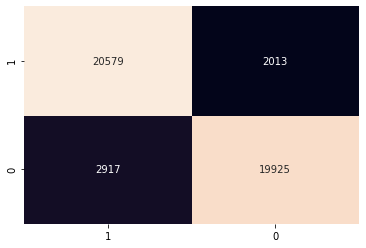

In [64]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [65]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     22842
           1       0.88      0.91      0.89     22592

    accuracy                           0.89     45434
   macro avg       0.89      0.89      0.89     45434
weighted avg       0.89      0.89      0.89     45434



In [66]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8914909539111678

### Implementacija sopstvenih loss funkcija

In [511]:
def my_mae(Y_actual, Y_predicted):
    
    Y_actual = tf.cast(Y_actual, tf.float64)
    Y_predicted = tf.cast(Y_predicted, tf.float64)
    return backend.mean(backend.abs(Y_actual - Y_predicted))

In [512]:
def my_mse(Y_actual, Y_predicted):
    
    Y_actual = tf.cast(Y_actual, tf.float64)
    Y_predicted = tf.cast(Y_predicted, tf.float64)
    return backend.mean(backend.pow((Y_actual - Y_predicted), 2))

In [513]:
def my_categorical_crossentropy(Y_actual, Y_predicted):
    
    Y_actual = tf.cast(Y_actual, tf.float64)
    Y_predicted = tf.cast(Y_predicted, tf.float64)
    return backend.mean((-Y_actual) * backend.log(Y_predicted))

### Varijanta skupa sa skaliranim numeričkim vrednostima, bez selekcije promenljivih i uzimanja u obzir kategoričkih promenljivih

In [479]:
model = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

- Upotreba **custom** **mean absolute error funkcije** kao **loss** funkcije

In [482]:
model.compile(optimizer=SGD(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Adam(learning_rate=0.0001)

In [483]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=5, verbose=2)

Epoch 1/5
10474/10474 - 3s - loss: 0.6344 - accuracy: 0.6555 - val_loss: 0.5266 - val_accuracy: 0.7827
Epoch 2/5
10474/10474 - 3s - loss: 0.5216 - accuracy: 0.7804 - val_loss: 0.5142 - val_accuracy: 0.7827
Epoch 3/5
10474/10474 - 3s - loss: 0.5123 - accuracy: 0.7804 - val_loss: 0.5051 - val_accuracy: 0.7827
Epoch 4/5
10474/10474 - 3s - loss: 0.5032 - accuracy: 0.7804 - val_loss: 0.4960 - val_accuracy: 0.7827
Epoch 5/5
10474/10474 - 3s - loss: 0.4948 - accuracy: 0.7804 - val_loss: 0.4883 - val_accuracy: 0.7827


In [449]:
predicted_values = model.predict(X_test)
predicted_values

array([[8.9754402e-12],
       [1.6074232e-11],
       [2.5830846e-11],
       ...,
       [2.5572879e-12],
       [1.4403676e-12],
       [1.1631549e-12]], dtype=float32)

In [450]:
new_predicted_values = []

for value in list(predicted_values):
    if value >= 0.5:
        new_predicted_values.append(1)
    else:
        new_predicted_values.append(0)

predicted_values = new_predicted_values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [451]:
counter = Counter(predicted_values)
counter.most_common()

[(0, 29092)]

In [443]:
# predicted_values = np.argmax(predicted_values, axis=-1)
# predicted_values

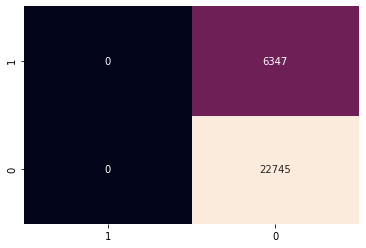

In [444]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [445]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     22745
           1       0.00      0.00      0.00      6347

    accuracy                           0.78     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.61      0.78      0.69     29092



/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [429]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.781830056372886

### Nakon dodavanja još jednog skrivenog sloja

In [363]:
model = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [364]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=my_categorical_crossentropy, metrics=['accuracy'])

In [365]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=10, verbose=2)

Epoch 1/10
16356/16356 - 6s - loss: 0.3470 - accuracy: 0.4891 - val_loss: 0.3458 - val_accuracy: 0.4155
Epoch 2/10
16356/16356 - 5s - loss: 0.3469 - accuracy: 0.5029 - val_loss: 0.3458 - val_accuracy: 0.5584
Epoch 3/10
16356/16356 - 5s - loss: 0.3469 - accuracy: 0.5005 - val_loss: 0.3458 - val_accuracy: 0.4989
Epoch 4/10
16356/16356 - 5s - loss: 0.3470 - accuracy: 0.4991 - val_loss: 0.3458 - val_accuracy: 0.4864
Epoch 5/10
16356/16356 - 5s - loss: 0.3469 - accuracy: 0.4970 - val_loss: 0.3458 - val_accuracy: 0.5145
Epoch 6/10
16356/16356 - 5s - loss: 0.3469 - accuracy: 0.5020 - val_loss: 0.3458 - val_accuracy: 0.4998
Epoch 7/10
16356/16356 - 5s - loss: 0.3469 - accuracy: 0.5024 - val_loss: 0.3458 - val_accuracy: 0.6231
Epoch 8/10
16356/16356 - 5s - loss: 0.3469 - accuracy: 0.4965 - val_loss: 0.3458 - val_accuracy: 0.4989
Epoch 9/10
16356/16356 - 5s - loss: 0.3469 - accuracy: 0.5027 - val_loss: 0.3458 - val_accuracy: 0.5001
Epoch 10/10
16356/16356 - 5s - loss: 0.3469 - accuracy: 0.5060 -

In [366]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.5000005 , 0.49999955],
       [0.50000036, 0.49999967],
       [0.5000007 , 0.49999928],
       ...,
       [0.4999993 , 0.5000007 ],
       [0.50000185, 0.4999982 ],
       [0.4999997 , 0.50000036]], dtype=float32)

In [353]:

# new_predicted_values = []

# for value in list(predicted_values):
#     if value >= 0.5:
#         new_predicted_values.append(1)
#     else:
#         new_predicted_values.append(0)
        
# predicted_values = new_predicted_values
# predicted_values

In [367]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([0, 0, 0, ..., 1, 0, 1])

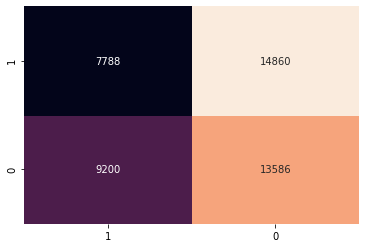

In [368]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [369]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.48      0.60      0.53     22786
           1       0.46      0.34      0.39     22648

    accuracy                           0.47     45434
   macro avg       0.47      0.47      0.46     45434
weighted avg       0.47      0.47      0.46     45434



In [370]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.47044063916890433

In [320]:
counter = Counter(Y_test.values)
counter.most_common()

[(0, 22786), (1, 22648)]

## Ispod sve obrisati!!!

In [69]:
Y_actual = tf.Variable([1, 0, 0, 1, 1, 0], dtype='float64')
Y_predicted = tf.Variable([0.3, 0.68, 0.87, 0.21, 0.54, 0.93], dtype='float64')

In [70]:
my_mae(Y_actual, Y_predicted)

<tf.Tensor: shape=(), dtype=float64, numpy=0.7383333333333333>

In [73]:
my_mse(Y_actual, Y_predicted)

<tf.Tensor: shape=(), dtype=float64, numpy=0.5683166666666667>

In [74]:
Y_actual = tf.Variable([[1.0, 0.0], [0.0, 1.0], [0.0, 1.0]], dtype='float64')
Y_predicted = tf.Variable([[0.3, 0.7], [0.6, 0.4], [0.2, 0.8]], dtype='float64')

In [75]:
my_mae(Y_actual, Y_predicted)

<tf.Tensor: shape=(), dtype=float64, numpy=0.29666666666666663>

In [77]:
my_categorical_crossentropy(Y_actual, Y_predicted)

<tf.Tensor: shape=(), dtype=float64, numpy=0.39056784791905014>

In [514]:
model = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=2, activation='softmax')
])

In [515]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [516]:
model.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=5, verbose=2)

Epoch 1/5
10474/10474 - 4s - loss: 0.5155 - accuracy: 0.7516 - val_loss: 0.4406 - val_accuracy: 0.8043
Epoch 2/5
10474/10474 - 3s - loss: 0.4192 - accuracy: 0.8103 - val_loss: 0.3992 - val_accuracy: 0.8186
Epoch 3/5
10474/10474 - 3s - loss: 0.3944 - accuracy: 0.8217 - val_loss: 0.3839 - val_accuracy: 0.8289
Epoch 4/5
10474/10474 - 3s - loss: 0.3838 - accuracy: 0.8273 - val_loss: 0.3767 - val_accuracy: 0.8339
Epoch 5/5
10474/10474 - 3s - loss: 0.3782 - accuracy: 0.8314 - val_loss: 0.3725 - val_accuracy: 0.8380


In [565]:
model_1 = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [566]:
model_1.compile(optimizer=SGD(learning_rate=0.0001), loss=my_mae, metrics=['accuracy'])

In [567]:
model_1.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
10474/10474 - 3s - loss: 0.4777 - accuracy: 0.6612 - val_loss: 0.4379 - val_accuracy: 0.7827
Epoch 2/20
10474/10474 - 3s - loss: 0.3995 - accuracy: 0.7804 - val_loss: 0.3614 - val_accuracy: 0.7827
Epoch 3/20
10474/10474 - 3s - loss: 0.3327 - accuracy: 0.7804 - val_loss: 0.3056 - val_accuracy: 0.7827
Epoch 4/20
10474/10474 - 3s - loss: 0.2895 - accuracy: 0.7804 - val_loss: 0.2731 - val_accuracy: 0.7827
Epoch 5/20
10474/10474 - 3s - loss: 0.2651 - accuracy: 0.7804 - val_loss: 0.2549 - val_accuracy: 0.7827
Epoch 6/20
10474/10474 - 3s - loss: 0.2513 - accuracy: 0.7804 - val_loss: 0.2444 - val_accuracy: 0.7827
Epoch 7/20
10474/10474 - 3s - loss: 0.2430 - accuracy: 0.7804 - val_loss: 0.2379 - val_accuracy: 0.7827
Epoch 8/20
10474/10474 - 3s - loss: 0.2378 - accuracy: 0.7804 - val_loss: 0.2336 - val_accuracy: 0.7827
Epoch 9/20
10474/10474 - 3s - loss: 0.2342 - accuracy: 0.7804 - val_loss: 0.2306 - val_accuracy: 0.7827
Epoch 10/20
10474/10474 - 3s - loss: 0.2317 - accuracy: 0.7804 -

In [538]:
predicted_values = model_1.predict(X_test)
predicted_values

array([[0.46302828, 0.53697175],
       [0.4467689 , 0.55323106],
       [0.4599986 , 0.5400014 ],
       ...,
       [0.4047228 , 0.5952772 ],
       [0.41564608, 0.584354  ],
       [0.47993323, 0.5200668 ]], dtype=float32)

In [539]:
predicted_values = np.argmax(predicted_values, axis=-1)
predicted_values

array([1, 1, 1, ..., 1, 1, 1])

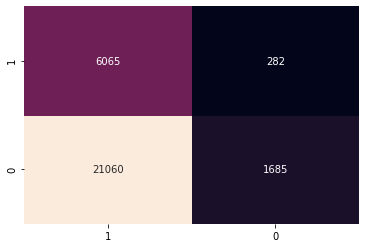

In [540]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [541]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.07      0.14     22745
           1       0.22      0.96      0.36      6347

    accuracy                           0.27     29092
   macro avg       0.54      0.51      0.25     29092
weighted avg       0.72      0.27      0.19     29092



In [542]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.26639626014024476

In [607]:
model_1 = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [608]:
model_1.compile(optimizer=Adam(learning_rate=0.001), loss=my_mse, metrics=['accuracy'])

In [609]:
model_1.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
10474/10474 - 4s - loss: 0.1197 - accuracy: 0.8330 - val_loss: 0.1140 - val_accuracy: 0.8460
Epoch 2/50
10474/10474 - 3s - loss: 0.1153 - accuracy: 0.8402 - val_loss: 0.1128 - val_accuracy: 0.8461
Epoch 3/50
10474/10474 - 3s - loss: 0.1142 - accuracy: 0.8413 - val_loss: 0.1134 - val_accuracy: 0.8452
Epoch 4/50
10474/10474 - 3s - loss: 0.1136 - accuracy: 0.8426 - val_loss: 0.1128 - val_accuracy: 0.8459
Epoch 5/50
10474/10474 - 3s - loss: 0.1131 - accuracy: 0.8432 - val_loss: 0.1109 - val_accuracy: 0.8489
Epoch 6/50
10474/10474 - 3s - loss: 0.1126 - accuracy: 0.8442 - val_loss: 0.1172 - val_accuracy: 0.8378
Epoch 7/50
10474/10474 - 3s - loss: 0.1122 - accuracy: 0.8447 - val_loss: 0.1108 - val_accuracy: 0.8482
Epoch 8/50
10474/10474 - 3s - loss: 0.1120 - accuracy: 0.8446 - val_loss: 0.1122 - val_accuracy: 0.8474
Epoch 9/50
10474/10474 - 3s - loss: 0.1117 - accuracy: 0.8458 - val_loss: 0.1114 - val_accuracy: 0.8482
Epoch 10/50
10474/10474 - 3s - loss: 0.1117 - accuracy: 0.8455 -

In [622]:
predicted_values = model_1.predict(X_test)
predicted_values

array([[0.02310249],
       [0.27905706],
       [0.13963315],
       ...,
       [0.04387611],
       [0.02437732],
       [0.07734957]], dtype=float32)

In [623]:
new_predicted_values = []
print(predicted_values.shape)
predicted_values = np.reshape(predicted_values, (29092, ))
for value in list(predicted_values):
    if value >= 0.5:
        new_predicted_values.append(1)
    else:
        new_predicted_values.append(0)
        
predicted_values = new_predicted_values
new_predicted_values
counter = Counter(new_predicted_values)
counter.most_common()

(29092, 1)


[(0, 25420), (1, 3672)]

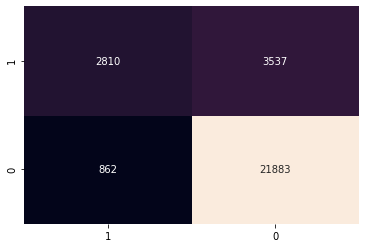

In [624]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [625]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22745
           1       0.77      0.44      0.56      6347

    accuracy                           0.85     29092
   macro avg       0.81      0.70      0.73     29092
weighted avg       0.84      0.85      0.83     29092



In [626]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8487900453732985

In [642]:
model_2 = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [643]:
model_2.compile(optimizer=SGD(learning_rate=0.000001), loss=my_mae, metrics=['accuracy'])

In [644]:
model_2.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
10474/10474 - 3s - loss: 0.4984 - accuracy: 0.5535 - val_loss: 0.4981 - val_accuracy: 0.5645
Epoch 2/50
10474/10474 - 3s - loss: 0.4979 - accuracy: 0.5757 - val_loss: 0.4976 - val_accuracy: 0.5944
Epoch 3/50
10474/10474 - 3s - loss: 0.4974 - accuracy: 0.6113 - val_loss: 0.4971 - val_accuracy: 0.6363
Epoch 4/50
10474/10474 - 3s - loss: 0.4969 - accuracy: 0.6479 - val_loss: 0.4966 - val_accuracy: 0.6706
Epoch 5/50
10474/10474 - 3s - loss: 0.4964 - accuracy: 0.6770 - val_loss: 0.4961 - val_accuracy: 0.6950
Epoch 6/50
10474/10474 - 3s - loss: 0.4959 - accuracy: 0.6958 - val_loss: 0.4956 - val_accuracy: 0.7114
Epoch 7/50
10474/10474 - 3s - loss: 0.4954 - accuracy: 0.7099 - val_loss: 0.4951 - val_accuracy: 0.7221
Epoch 8/50
10474/10474 - 3s - loss: 0.4949 - accuracy: 0.7219 - val_loss: 0.4946 - val_accuracy: 0.7332
Epoch 9/50
10474/10474 - 3s - loss: 0.4944 - accuracy: 0.7321 - val_loss: 0.4941 - val_accuracy: 0.7426
Epoch 10/50
10474/10474 - 3s - loss: 0.4939 - accuracy: 0.7416 -

In [645]:
predicted_values = model_2.predict(X_test)
predicted_values

array([[0.46035385],
       [0.43287265],
       [0.44986764],
       ...,
       [0.44678152],
       [0.45643437],
       [0.44028834]], dtype=float32)

In [646]:
new_predicted_values = []
# print(predicted_values.shape)
predicted_values = np.reshape(predicted_values, (29092, ))
for value in list(predicted_values):
    if value >= 0.5:
        new_predicted_values.append(1)
    else:
        new_predicted_values.append(0)
        
predicted_values = new_predicted_values
new_predicted_values
counter = Counter(new_predicted_values)
counter.most_common()

[(0, 29092)]

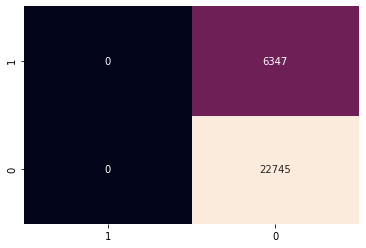

In [647]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [648]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     22745
           1       0.00      0.00      0.00      6347

    accuracy                           0.78     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.61      0.78      0.69     29092



/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [649]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.781830056372886

In [650]:
model_2 = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [653]:
model_2.compile(optimizer=SGD(learning_rate=0.00001), loss=my_mae, metrics=['accuracy'])

In [654]:
model_2.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
10474/10474 - 4s - loss: 0.5400 - accuracy: 0.2196 - val_loss: 0.5360 - val_accuracy: 0.2173
Epoch 2/50
10474/10474 - 3s - loss: 0.5319 - accuracy: 0.2196 - val_loss: 0.5281 - val_accuracy: 0.2173
Epoch 3/50
10474/10474 - 3s - loss: 0.5243 - accuracy: 0.2194 - val_loss: 0.5206 - val_accuracy: 0.2176
Epoch 4/50
10474/10474 - 3s - loss: 0.5171 - accuracy: 0.2199 - val_loss: 0.5135 - val_accuracy: 0.2208
Epoch 5/50
10474/10474 - 3s - loss: 0.5102 - accuracy: 0.2417 - val_loss: 0.5069 - val_accuracy: 0.2799
Epoch 6/50
10474/10474 - 3s - loss: 0.5038 - accuracy: 0.3876 - val_loss: 0.5006 - val_accuracy: 0.5092
Epoch 7/50
10474/10474 - 3s - loss: 0.4978 - accuracy: 0.6009 - val_loss: 0.4948 - val_accuracy: 0.6851
Epoch 8/50
10474/10474 - 3s - loss: 0.4923 - accuracy: 0.7151 - val_loss: 0.4895 - val_accuracy: 0.7511
Epoch 9/50
10474/10474 - 3s - loss: 0.4872 - accuracy: 0.7595 - val_loss: 0.4846 - val_accuracy: 0.7743
Epoch 10/50
10474/10474 - 3s - loss: 0.4826 - accuracy: 0.7747 -

In [655]:
predicted_values = model_2.predict(X_test)
predicted_values

array([[0.23350957],
       [0.23183909],
       [0.23578179],
       ...,
       [0.22867608],
       [0.24717894],
       [0.23300493]], dtype=float32)

In [656]:
new_predicted_values = []
predicted_values = np.reshape(predicted_values, (29092, ))
for value in list(predicted_values):
    if value >= 0.5:
        new_predicted_values.append(1)
    else:
        new_predicted_values.append(0)
        
predicted_values = new_predicted_values
new_predicted_values
counter = Counter(new_predicted_values)
counter.most_common()

[(0, 29092)]

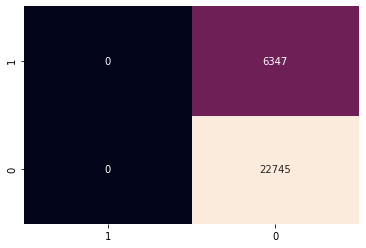

In [657]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [658]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     22745
           1       0.00      0.00      0.00      6347

    accuracy                           0.78     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.61      0.78      0.69     29092



/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivanz/Desktop/machine_learning_project_3/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [659]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.781830056372886

In [660]:
model_2 = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [661]:
model_2.compile(optimizer=Adam(learning_rate=0.001), loss=my_mae, metrics=['accuracy'])

In [662]:
model_2.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
10474/10474 - 4s - loss: 0.2130 - accuracy: 0.7889 - val_loss: 0.1666 - val_accuracy: 0.8345
Epoch 2/50
10474/10474 - 4s - loss: 0.1662 - accuracy: 0.8346 - val_loss: 0.1566 - val_accuracy: 0.8443
Epoch 3/50
10474/10474 - 4s - loss: 0.1642 - accuracy: 0.8363 - val_loss: 0.1584 - val_accuracy: 0.8415
Epoch 4/50
10474/10474 - 4s - loss: 0.1632 - accuracy: 0.8370 - val_loss: 0.1725 - val_accuracy: 0.8274
Epoch 5/50
10474/10474 - 4s - loss: 0.1642 - accuracy: 0.8359 - val_loss: 0.1603 - val_accuracy: 0.8397
Epoch 6/50
10474/10474 - 4s - loss: 0.1634 - accuracy: 0.8367 - val_loss: 0.1557 - val_accuracy: 0.8441
Epoch 7/50
10474/10474 - 4s - loss: 0.1623 - accuracy: 0.8378 - val_loss: 0.1713 - val_accuracy: 0.8288
Epoch 8/50
10474/10474 - 4s - loss: 0.1637 - accuracy: 0.8364 - val_loss: 0.1596 - val_accuracy: 0.8401
Epoch 9/50
10474/10474 - 4s - loss: 0.1646 - accuracy: 0.8354 - val_loss: 0.1577 - val_accuracy: 0.8423
Epoch 10/50
10474/10474 - 4s - loss: 0.1641 - accuracy: 0.8358 -

In [663]:
predicted_values = model_2.predict(X_test)
predicted_values

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [664]:
new_predicted_values = []
predicted_values = np.reshape(predicted_values, (29092, ))
for value in list(predicted_values):
    if value >= 0.5:
        new_predicted_values.append(1)
    else:
        new_predicted_values.append(0)
        
predicted_values = new_predicted_values
new_predicted_values
counter = Counter(new_predicted_values)
counter.most_common()

[(0, 25460), (1, 3632)]

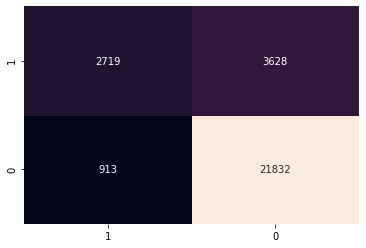

In [665]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [666]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22745
           1       0.75      0.43      0.54      6347

    accuracy                           0.84     29092
   macro avg       0.80      0.69      0.73     29092
weighted avg       0.83      0.84      0.83     29092



In [667]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8439089784133095

In [712]:
model_2 = Sequential([
    Dense(units=8, input_shape=(16, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [713]:
model_2.compile(optimizer=Adam(learning_rate=0.0001), loss=my_mae, metrics=['accuracy'])

In [714]:
model_2.fit(x=X_train, y=Y_train, validation_split=0.1, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
10474/10474 - 4s - loss: 0.2300 - accuracy: 0.7795 - val_loss: 0.2077 - val_accuracy: 0.7902
Epoch 2/50
10474/10474 - 4s - loss: 0.1871 - accuracy: 0.8203 - val_loss: 0.1708 - val_accuracy: 0.8337
Epoch 3/50
10474/10474 - 4s - loss: 0.1715 - accuracy: 0.8318 - val_loss: 0.1645 - val_accuracy: 0.8388
Epoch 4/50
10474/10474 - 4s - loss: 0.1683 - accuracy: 0.8341 - val_loss: 0.1623 - val_accuracy: 0.8407
Epoch 5/50
10474/10474 - 4s - loss: 0.1667 - accuracy: 0.8348 - val_loss: 0.1606 - val_accuracy: 0.8411
Epoch 6/50
10474/10474 - 4s - loss: 0.1657 - accuracy: 0.8352 - val_loss: 0.1599 - val_accuracy: 0.8410
Epoch 7/50
10474/10474 - 4s - loss: 0.1650 - accuracy: 0.8362 - val_loss: 0.1597 - val_accuracy: 0.8404
Epoch 8/50
10474/10474 - 4s - loss: 0.1644 - accuracy: 0.8364 - val_loss: 0.1612 - val_accuracy: 0.8394
Epoch 9/50
10474/10474 - 4s - loss: 0.1641 - accuracy: 0.8366 - val_loss: 0.1591 - val_accuracy: 0.8423
Epoch 10/50
10474/10474 - 4s - loss: 0.1634 - accuracy: 0.8374 -

In [716]:
predicted_values = model_2.predict(X_test)
predicted_values

array([[1.09034195e-36],
       [1.67098384e-11],
       [1.10663732e-15],
       ...,
       [2.23142306e-29],
       [1.06007183e-33],
       [1.44193050e-21]], dtype=float32)

In [717]:
new_predicted_values = []
predicted_values = np.reshape(predicted_values, (29092, ))
for value in list(predicted_values):
    if value >= 0.5:
        new_predicted_values.append(1)
    else:
        new_predicted_values.append(0)
        
predicted_values = new_predicted_values
new_predicted_values
counter = Counter(new_predicted_values)
counter.most_common()

[(0, 24597), (1, 4495)]

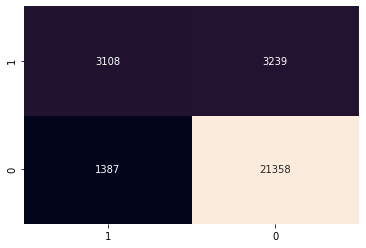

In [718]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=['No', 'Yes'], columns=['No', 'Yes'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, cbar=False, annot=True, fmt='d')
h_map.invert_xaxis()
h_map.invert_yaxis()

In [719]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22745
           1       0.69      0.49      0.57      6347

    accuracy                           0.84     29092
   macro avg       0.78      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [720]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8409872129795133